### Project Stage - IV (Basic Machine Learning)

#### Goals

The goal of Stage IV is to utlize machine learning and statistical models to predict the trend of COVID-19 cases / deaths.


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import kurtosis, poisson, chi2_contingency, pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.dates as mdates
import statsmodels.api as sm
import scipy.stats as st

The code imports essential Python libraries for data analysis, visualization, and statistical modeling, including pandas and numpy for data manipulation and numerical computing, scipy.stats for statistical functions, seaborn and matplotlib.pyplot for visualization, and sklearn for machine learning tasks such as linear regression. Additionally, it imports plotly and statsmodels for advanced visualization and statistical modeling, respectively.

In [2]:
merged_df=pd.read_csv("modified_merge.csv")# reading modified_deaths.csv file
merged_df

,countyFIPS,County Name,State,StateFIPS,population,Date,Cases,Deaths
0,0,Statewide Unallocated,AL,1,0,2020-06-01,0,0
1,0,Statewide Unallocated,AK,2,0,2020-06-01,2,0
2,0,Statewide Unallocated,AZ,4,0,2020-06-01,0,0
3,0,Statewide Unallocated,AR,5,0,2020-06-01,189,0
4,0,Statewide Unallocated,CA,6,0,2020-06-01,21,0
...,...,...,...,...,...,...,...,...
692876,56037,Sweetwater County,WY,56,42343,2021-01-03,3020,16
692877,56039,Teton County,WY,56,23464,2021-01-03,2159,4
692878,56041,Uinta County,WY,56,20226,2021-01-03,1570,7
692879,56043,Washakie County,WY,56,7805,2021-01-03,783,19


* Reading a CSV file named "modified_merge.csv" into a pandas DataFrame called "merged_df" using the pd.read_csv() function. It then displays the contents of the DataFrame.
### Utilize Linear and Non-Linear (polynomial with degree n) regression models to compare trends for a single state (each member should choose different state) and its counties (top 5 with highest number of cases). Start your data from 2020.06.01 (Monday) to 2021.01.03 (Sunday).

In [3]:
SC_df=merged_df[merged_df['State']=='SC']#filtering the rows with state carolina for data
SC_df

,countyFIPS,County Name,State,StateFIPS,population,Date,Cases,Deaths
40,0,Statewide Unallocated,SC,45,0,2020-06-01,0,0
2367,45001,Abbeville County,SC,45,24527,2020-06-01,44,0
2368,45003,Aiken County,SC,45,170872,2020-06-01,206,7
2369,45005,Allendale County,SC,45,8688,2020-06-01,38,3
2370,45007,Anderson County,SC,45,202558,2020-06-01,241,9
...,...,...,...,...,...,...,...,...
692096,45083,Spartanburg County,SC,45,319785,2021-01-03,20769,405
692097,45085,Sumter County,SC,45,106721,2021-01-03,5695,122
692098,45087,Union County,SC,45,27316,2021-01-03,1618,43
692099,45089,Williamsburg County,SC,45,30368,2021-01-03,2273,63


* filtering rows from the DataFrame "merged_df" where the 'State' column equals 'SC' (South Carolina), storing the result in a new DataFrame named "SC_df".

In [4]:
# Sorting the data by County Name and Date
SC_df = SC_df.sort_values(by=['County Name', 'Date'])

# Calculating new cases and new deaths for the entire dataset and adding these two new columns to our SC dataframe.
SC_df['new_cases'] = SC_df.groupby('County Name')['Cases'].diff().fillna(0)
SC_df['new_deaths'] = SC_df.groupby('County Name')['Deaths'].diff().fillna(0)
SC_df

,countyFIPS,County Name,State,StateFIPS,population,Date,Cases,Deaths,new_cases,new_deaths
2367,45001,Abbeville County,SC,45,24527,2020-06-01,44,0,0.0,0.0
5560,45001,Abbeville County,SC,45,24527,2020-06-02,46,0,2.0,0.0
8753,45001,Abbeville County,SC,45,24527,2020-06-03,46,0,0.0,0.0
11946,45001,Abbeville County,SC,45,24527,2020-06-04,47,0,1.0,0.0
15139,45001,Abbeville County,SC,45,24527,2020-06-05,47,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
679328,45091,York County,SC,45,280979,2020-12-30,14939,178,121.0,0.0
682521,45091,York County,SC,45,280979,2020-12-31,15208,180,269.0,2.0
685714,45091,York County,SC,45,280979,2021-01-01,15208,180,0.0,0.0
688907,45091,York County,SC,45,280979,2021-01-02,15625,183,417.0,3.0


* Sorting the DataFrame "SC_df" by 'County Name' and 'Date' in ascending order. 
* It then calculates the daily new cases and new deaths for each county in South Carolina by taking the difference between consecutive 'Cases' and 'Deaths' values, respectively. 
* These values are filled with 0 for the initial rows. 
* The resulting DataFrame "SC_df" now includes additional columns 'new_cases' and 'new_deaths'.

### X-Axis - number of days, Y-Axis number of new cases and deaths. Calcluate error using RMSE.

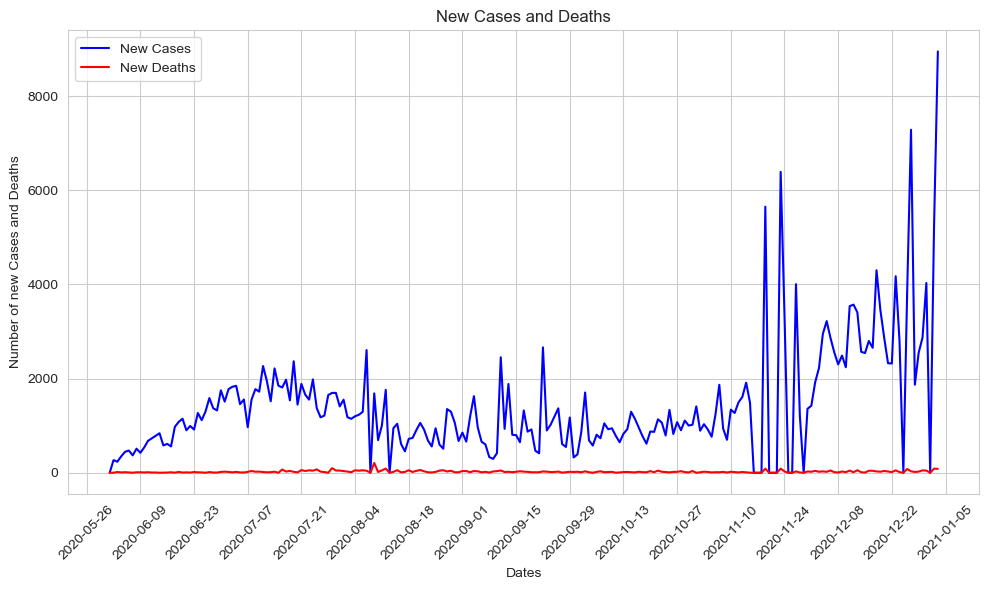

In [48]:

SC_df.loc[SC_df['new_cases'] < 0, 'new_cases'] = 0
SC_df.loc[SC_df['new_deaths'] < 0, 'new_deaths'] = 0
# Group by date and sum new cases and new deaths
cases_deaths_by_date = SC_df.groupby('Date')[['new_cases', 'new_deaths']].sum().reset_index()

sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
SC_df['Date'] = pd.to_datetime(SC_df['Date'])
# Plotting new cases
sns.lineplot(data=cases_deaths_by_date, x='Date', y='new_cases', label='New Cases', color='blue')

# Plotting new deaths
sns.lineplot(data=cases_deaths_by_date, x='Date', y='new_deaths', label='New Deaths', color='red')

plt.xlabel('Dates')
plt.ylabel('Number of new Cases and Deaths')
plt.title('New Cases and Deaths')
plt.legend()

# Customize x-axis tick labels
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))  # Display tick labels every 2 weeks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the tick labels

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
#print(SC_df['Date'].head())

* The plot shows two lines: one representing the trend of new cases and the other representing the trend of new deaths over time.
* The x-axis displays dates ranging from June 1, 2020, to January 3, 2021.
* The y-axis represents the number of new cases and new deaths.
* The blue line represents the trend of new cases, and the red line represents the trend of new deaths.

Observations:
* The number of new cases starts from 0 on June 1, 2020, and gradually increases over time.
* There are fluctuations in the number of new cases, with some days having higher counts than others.
* The peak in the number of new cases occurs on January 3, 2021, with 8951 cases reported on that day.
* Overall, there is an increasing trend in the number of new cases over the specified time period.

In [6]:

# Function for calculating RMSE (Root Mean Squared Error)
def rmse_cal(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse


# Function for fitting polynomial regression
def polynomial_reg(X, y, degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    return model

# Function for fitting linear regression
def linear_reg(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

x_val= np.arange(len(cases_deaths_by_date)).reshape(-1, 1)
y_val1= cases_deaths_by_date['new_cases']
y_val2= cases_deaths_by_date['new_deaths']

* The above cell defines functions for calculating RMSE (Root Mean Squared Error) between true and predicted values, fitting polynomial regression models, and fitting linear regression models using sklearn's libraries. 
* It also initializes variables for input data and target variables,for model training and evaluation.

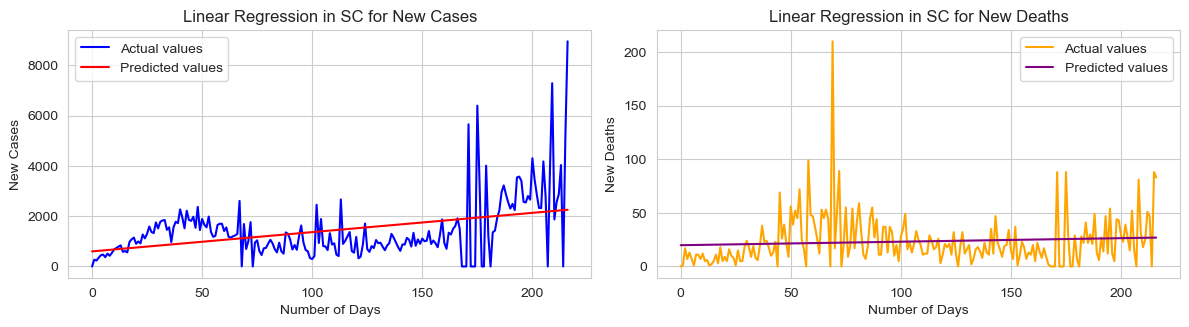

In [7]:
# Fitting linear regression models for the South Carolina data (cases and deaths)
lm_cases= linear_reg(x_val, y_val1)
lm_deaths= linear_reg(x_val, y_val2)

# Predicting with the models
y_pred_lm_cases=lm_cases.predict(x_val)
y_pred_lm_deaths= lm_deaths.predict(x_val)

# Calculating RMSE for South Carolina
rmse_lm_cases = rmse_cal(y_val1, y_pred_lm_cases)
rmse_lm_deaths= rmse_cal(y_val2, y_pred_lm_deaths)


def plot_results(x_val, y_actual, y_pred, title, xlabel, ylabel, color_actual, color_pred):
    plt.plot(x_val, y_actual, label='Actual values', color=color_actual)
    plt.plot(x_val, y_pred, label='Predicted values', color=color_pred)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

def plot_linear_regression_results(x_val, y_val1, y_pred_lm_cases, y_val2, y_pred_lm_deaths):
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    
    plt.subplot(221)
    plot_results(x_val, y_val1, y_pred_lm_cases, 'Linear Regression in SC for New Cases', 'Number of Days', 'New Cases', 'blue', 'red')

    plt.subplot(222)
    plot_results(x_val, y_val2, y_pred_lm_deaths, 'Linear Regression in SC for New Deaths', 'Number of Days', 'New Deaths', 'orange', 'purple')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot linear regression results
plot_linear_regression_results(x_val, y_val1, y_pred_lm_cases, y_val2, y_pred_lm_deaths)


Linear Regression for New Cases:
- The subplot on the top left depicts the linear regression results for new cases in South Carolina.
- The blue line represents the actual values of new cases over time.
- The red line represents the predicted values of new cases based on the linear regression model.
- The plot shows how well the linear regression model fits the trend of new cases over the given time period.

Linear Regression for New Deaths:
- The subplot on the top right illustrates the linear regression results for new deaths in South Carolina.
- The orange line represents the actual values of new deaths over time.
- The purple line represents the predicted values of new deaths based on the linear regression model.
- Similar to the new cases plot, the plot demonstrates the performance of the linear regression model in capturing the trend of new deaths over the specified time frame.


In [8]:
print(f" RMSE for Linear Regression for New Cases in SC: {rmse_lm_cases:.2f}")
print(f" RMSE for Linear Regression for New Deaths in SC: {rmse_lm_deaths:.2f}")

 RMSE for Linear Regression for New Cases in SC: 1111.00
 RMSE for Linear Regression for New Deaths in SC: 23.31


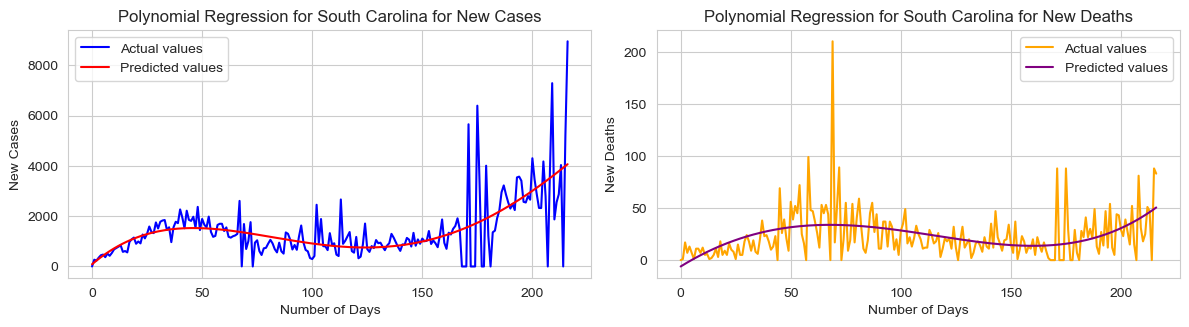

In [9]:
# Fitting polynomial regression models for the South Carolina data (cases and deaths)
degree = 4  # choosing the degree 3 for the polynomial
poly = PolynomialFeatures(degree=degree)  # Defining the poly object
X_poly= poly.fit_transform(x_val)
poly_c= linear_reg(X_poly, y_val1)
poly_d= linear_reg(X_poly,y_val2)

# Predicting with the models
y_pred_poly_c= poly_c.predict(X_poly)
y_pred_poly_d= poly_d.predict(X_poly)

# Calculating RMSE for South Carolina
rmse_poly_new_c= rmse_cal(y_val1, y_pred_poly_c)
rmse_poly_new_d= rmse_cal(y_val2, y_pred_poly_d)

def plot_polynomial_regression_results(x_val, y_val1, y_pred_poly_cases, y_val2, y_pred_poly_deaths):
    plt.figure(figsize=(12, 6))
    
    # Polynomial Regression Plots
    plt.subplot(223)
    plot_results(x_val, y_val1, y_pred_poly_cases, 'Polynomial Regression for South Carolina for New Cases', 'Number of Days', 'New Cases', 'blue', 'red')
    
    plt.subplot(224)
    plot_results(x_val, y_val2, y_pred_poly_deaths, 'Polynomial Regression for South Carolina for New Deaths', 'Number of Days', 'New Deaths', 'orange', 'purple')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot polynomial regression results
plot_polynomial_regression_results(x_val, y_val1, y_pred_poly_c, y_val2, y_pred_poly_d)



The above code fits polynomial regression models of degree 4 to the South Carolina data for both new cases and new deaths. After fitting the models, it predicts the values and calculates the root mean squared error (RMSE) for both cases and deaths.

It defines a function plot_polynomial_regression_results to plot the results of polynomial regression for both new cases and new deaths. This function creates a figure with two subplots, one for new cases and one for new deaths, each displaying the actual data points, the polynomial regression line, and the corresponding labels.

The function plot_polynomial_regression_results is then called with the necessary arguments to generate the plots for the polynomial regression results.

In [10]:
print(f"RMSE for Polynomial Regression New Cases: {rmse_poly_new_c:.2f}")
print(f"RMSE for Polynomial Regression New Deaths: {rmse_poly_new_d:.2f}")
# Calculating the top 5 counties with the highest cases within South Carolina
top_counties = SC_df.groupby('County Name')[['Cases']].max().sort_values(by='Cases', ascending=False).head(5)
top_county_names = top_counties.index.tolist()

# Creating DataFrames for each of the top 5 counties
county_data = {county:SC_df[SC_df['County Name'] == county] for county in top_county_names}

RMSE for Polynomial Regression New Cases: 914.04
RMSE for Polynomial Regression New Deaths: 21.16


The first two lines print the root mean squared error (RMSE) for the polynomial regression models fitted to the South Carolina data for new cases and new deaths, respectively. These lines use f-strings to format the output with two decimal places.

The third line calculates the top 5 counties with the highest cases within South Carolina. It groups the data by 'County Name', selects the maximum number of cases within each county, sorts the counties by the maximum cases in descending order, and then selects the top 5 counties. Finally, it extracts the names of these counties into a list named top_county_names.

### Identify which counties are most at risk. Model for top 5 counties with cases within a state and describe their trends. (10 points)

In [11]:
print("List of counties that are most at risk(top 5 infected counties in SC).")
top_county_names

List of counties that are most at risk(top 5 infected counties in SC).


['Greenville County ',
 'Richland County ',
 'Charleston County ',
 'Horry County ',
 'Spartanburg County ']

In [12]:
county_data

{'Greenville County ':         countyFIPS         County Name State  StateFIPS  population  \
 2389         45045  Greenville County     SC         45      523542   
 5582         45045  Greenville County     SC         45      523542   
 8775         45045  Greenville County     SC         45      523542   
 11968        45045  Greenville County     SC         45      523542   
 15161        45045  Greenville County     SC         45      523542   
 ...            ...                 ...   ...        ...         ...   
 679305       45045  Greenville County     SC         45      523542   
 682498       45045  Greenville County     SC         45      523542   
 685691       45045  Greenville County     SC         45      523542   
 688884       45045  Greenville County     SC         45      523542   
 692077       45045  Greenville County     SC         45      523542   
 
              Date  Cases  Deaths  new_cases  new_deaths  
 2389   2020-06-01   1690      57        0.0         

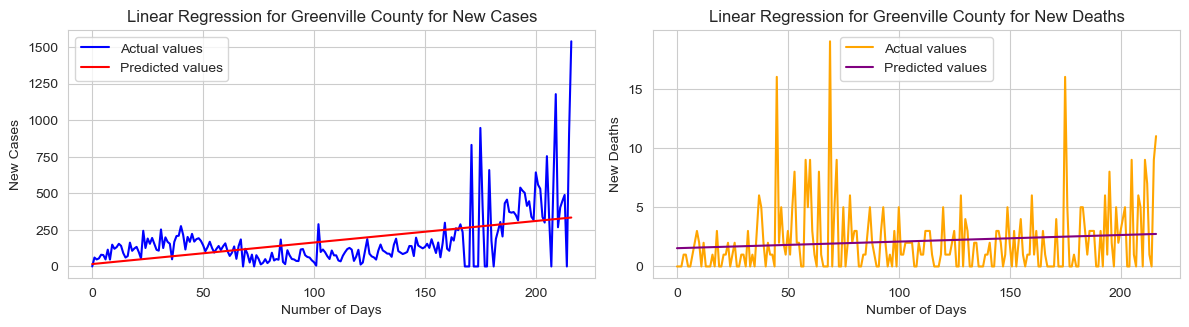

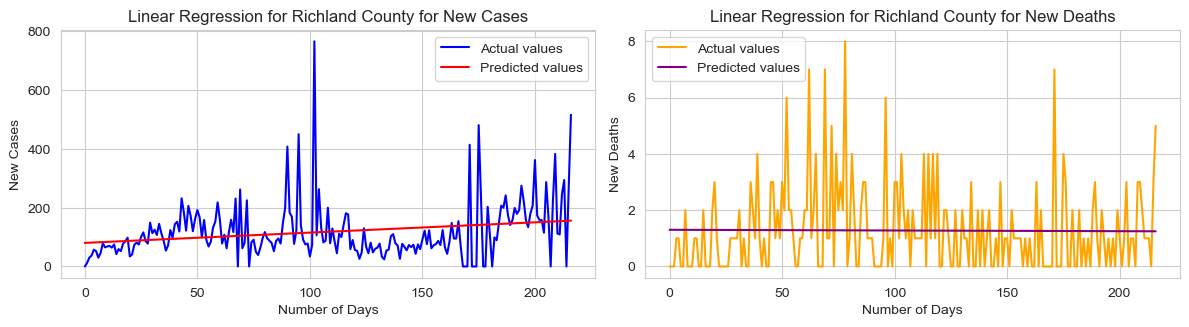

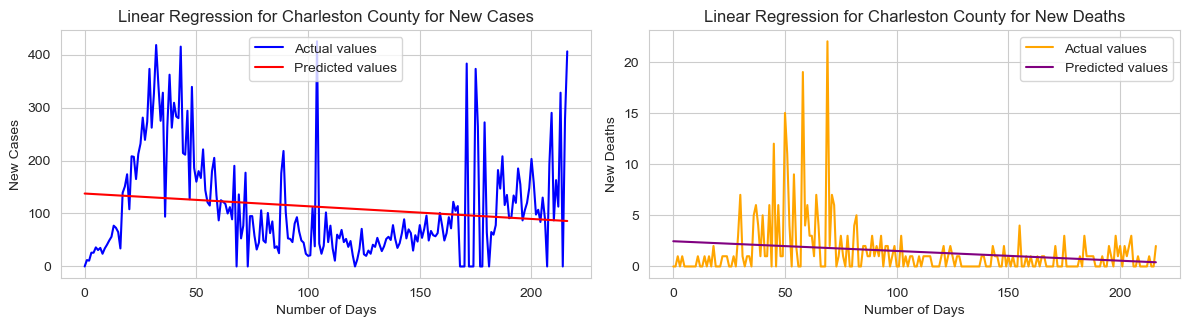

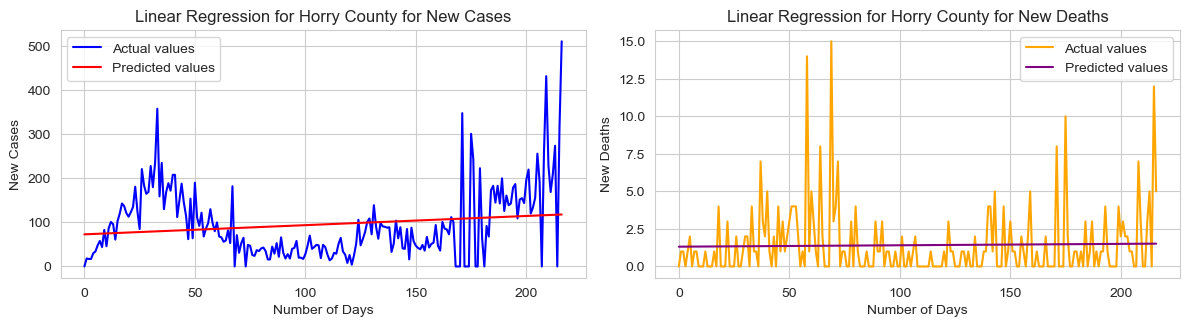

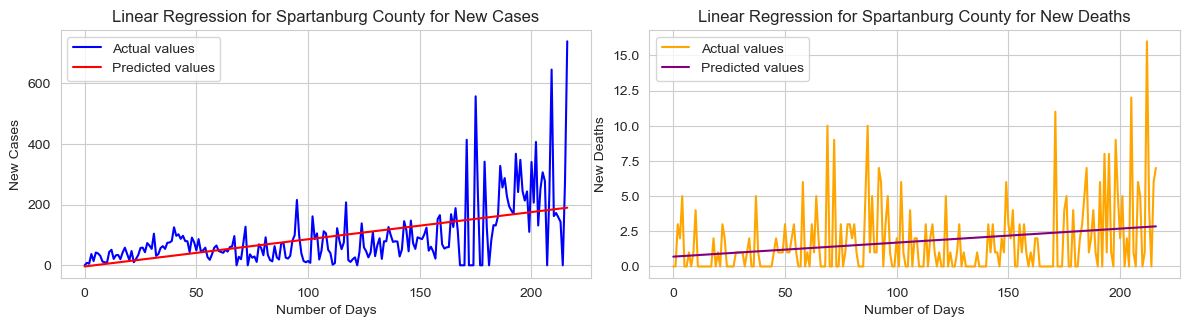

In [13]:
def plot_linear_regression_county_results(X_county, y_county_c, y_pred_linear_c, y_county_d, y_pred_linear_d, county_name):
    plt.figure(figsize=(12, 6))
    
    # Linear Regression Plots for New Cases
    plt.subplot(221)
    plot_results(X_county, y_county_c, y_pred_linear_c, f'Linear Regression for {county_name}for New Cases', 'Number of Days', 'New Cases', 'blue', 'red')

    # Linear Regression Plots for New Deaths
    plt.subplot(222)
    plot_results(X_county, y_county_d, y_pred_linear_d, f'Linear Regression for {county_name}for New Deaths', 'Number of Days', 'New Deaths', 'orange', 'purple')

    plt.tight_layout()
    plt.show()

# Performing linear regression analysis for the top 5 counties of SC state
for county_name in top_county_names:
    county_data_df = county_data[county_name]
    X_county = np.arange(len(county_data_df)).reshape(-1, 1)
    y_county_c= county_data_df['new_cases']
    y_county_d= county_data_df['new_deaths']

    # Fitting linear regression models
    linear_model_c= linear_reg(X_county, y_county_c)
    linear_model_d= linear_reg(X_county, y_county_d)

    # Predicting with the models
    y_pred_linear_c = linear_model_c.predict(X_county)
    y_pred_linear_d= linear_model_d.predict(X_county)
    
    # Call the function to plot linear regression results for the county
    plot_linear_regression_county_results(X_county, y_county_c, y_pred_linear_c, y_county_d, y_pred_linear_d, county_name)



The code above defines a function plot_linear_regression_county_results that plots the linear regression results for new cases and new deaths for a specific county.

- X_county: The input feature array for the county.
- y_county_c: The target variable array for new cases in the county.
- y_pred_linear_c: The predicted values of new cases using linear regression for the county.
- y_county_d: The target variable array for new deaths in the county.
- y_pred_linear_d: The predicted values of new deaths using linear regression for the county.
- county_name: The name of the county for which the linear regression results are being plotted.

It then loops over the top 5 counties in South Carolina (top_county_names), performs linear regression analysis for each county, fits linear regression models for new cases and new deaths, predicts with the models, and calls the plot_linear_regression_county_results function to plot the linear regression results for each county.

In [14]:
def calculate_and_print_rmse(county_name, X_county, y_county_new_cases, y_county_new_deaths, y_pred_linear_new_cases_county, y_pred_linear_new_deaths_county):
    rmse_linear_c= rmse_cal(y_county_new_cases, y_pred_linear_new_cases_county)
    rmse_linear_d= rmse_cal(y_county_new_deaths, y_pred_linear_new_deaths_county)
    
    print(f"County: {county_name}")
    print(f"RMSE for Linear Regression for New Cases: {rmse_linear_c:.2f}")
    print(f"RMSE for Linear Regression for New Deaths: {rmse_linear_d:.2f}\n")

for county_name in top_county_names:
    county_data_df = county_data[county_name]

    X_county = np.arange(len(county_data_df)).reshape(-1, 1)
    y_county_new_cases = county_data_df['new_cases']
    y_county_new_deaths = county_data_df['new_deaths']
    
    # Fitting linear regression models
    linear_model_new_cases_county = linear_reg(X_county, y_county_new_cases)
    linear_model_new_deaths_county = linear_reg(X_county, y_county_new_deaths)
    
    # Predicting with the models
    y_pred_linear_new_cases_county = linear_model_new_cases_county.predict(X_county)
    y_pred_linear_new_deaths_county = linear_model_new_deaths_county.predict(X_county)

    calculate_and_print_rmse(county_name, X_county, y_county_new_cases, y_county_new_deaths, y_pred_linear_new_cases_county, y_pred_linear_new_deaths_county)


County: Greenville County 
RMSE for Linear Regression for New Cases: 175.83
RMSE for Linear Regression for New Deaths: 2.88

County: Richland County 
RMSE for Linear Regression for New Cases: 94.08
RMSE for Linear Regression for New Deaths: 1.53

County: Charleston County 
RMSE for Linear Regression for New Cases: 97.31
RMSE for Linear Regression for New Deaths: 2.74

County: Horry County 
RMSE for Linear Regression for New Cases: 79.80
RMSE for Linear Regression for New Deaths: 2.28

County: Spartanburg County 
RMSE for Linear Regression for New Cases: 89.69
RMSE for Linear Regression for New Deaths: 2.49



* The function calculate_and_print_rmse() computes and prints the RMSE (Root Mean Squared Error) for linear regression models fitted to new cases and new deaths data for a specific county.
* For each county in top_county_names, the function is called with relevant data.
* The data for each county includes the X values (number of days), new cases, and new deaths.
* Linear regression models are fitted to both new cases and new deaths data for each county.
* Predictions are made using the fitted models.
* The RMSE values for both new cases and new deaths are calculated and printed alongside the county name.
* The RMSE values represent the error between the actual and predicted values for new cases and new deaths in different counties of South Carolina. Lower RMSE values indicate better model performance.

#### Observations
- Greenville County has the highest RMSE for new cases, indicating higher prediction errors compared to other counties, while its RMSE for new deaths is relatively low.
- Richland County shows moderate RMSE values for both new cases and new deaths.
- Charleston County has a slightly higher RMSE for new cases compared to Richland County, but its RMSE for new deaths is notably higher.
- Horry County has the lowest RMSE for new cases among the analyzed counties, suggesting better predictive accuracy for new cases, while its RMSE for new deaths is also relatively low.
- Spartanburg County's RMSE values for both new cases and new deaths are moderate, falling between the extremes observed in other counties.
In conclusion, while the RMSE values provide insights into the accuracy of the linear regression models for predicting COVID-19 new cases and deaths, further analysis may be necessary to understand the factors contributing to the variations in prediction errors among different counties.

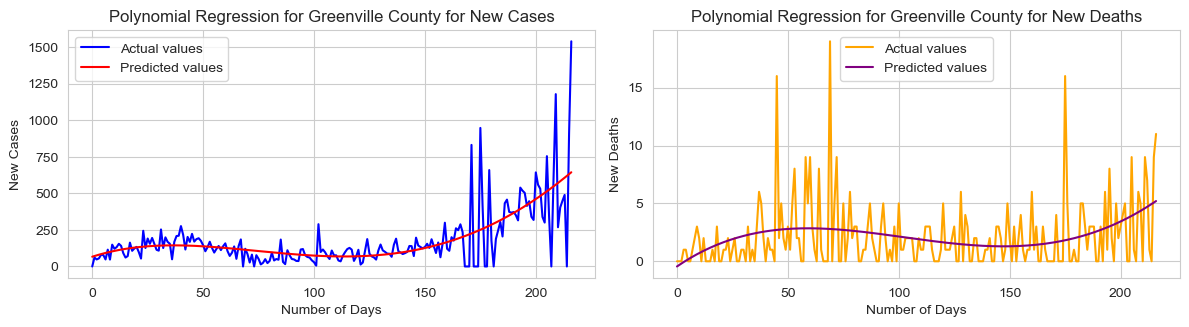

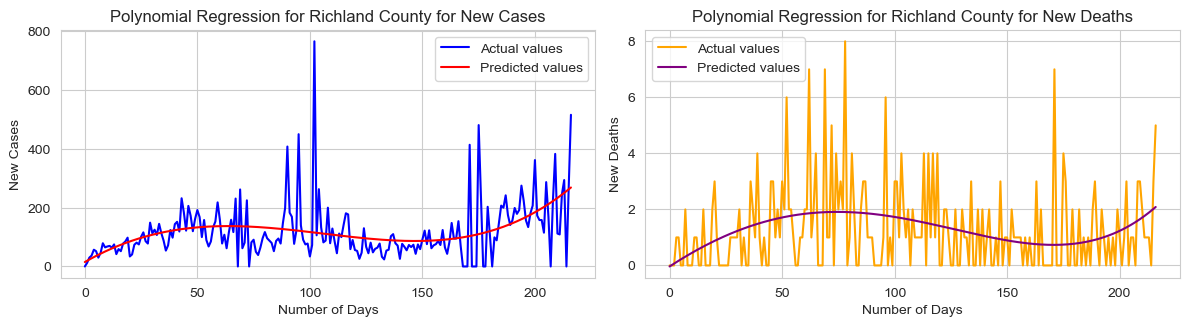

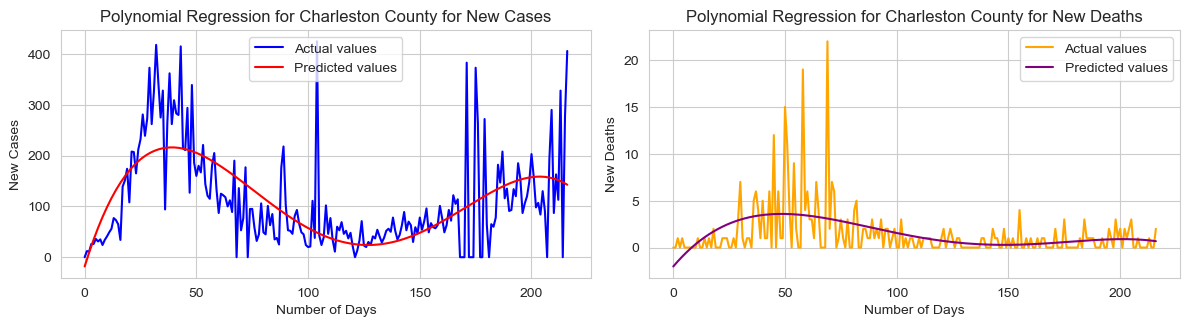

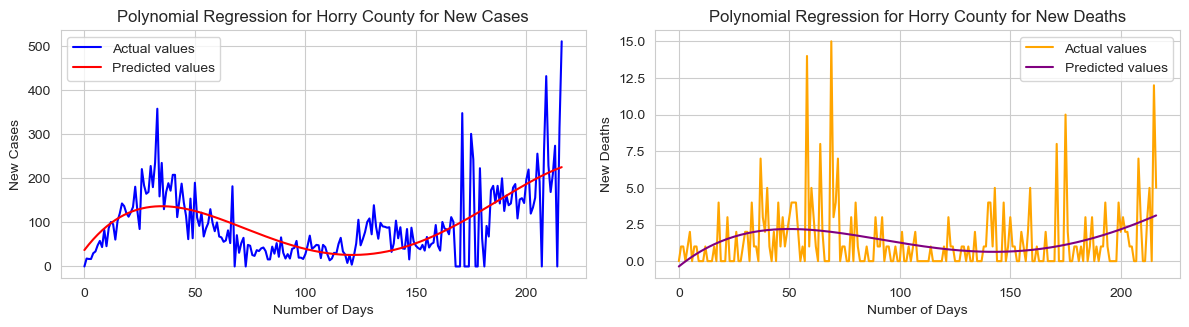

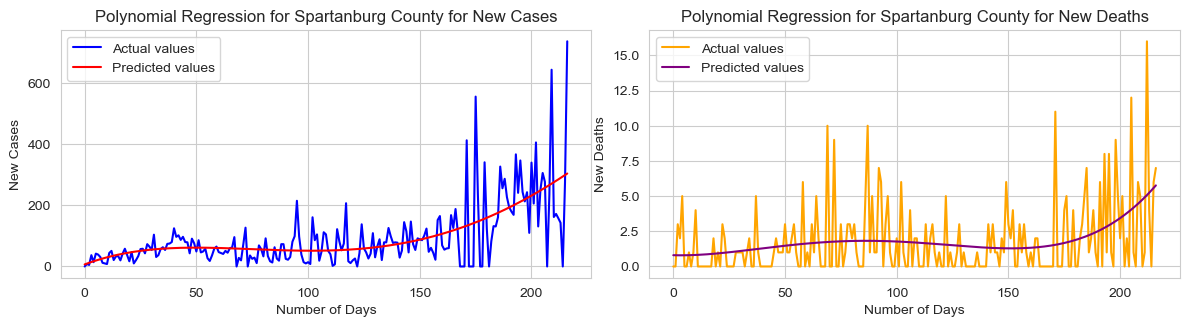

In [15]:
def plot_polynomial_regression_county_results(X, y_c, y_pred_c, y_d, y_pred_d, county_name):
    plt.figure(figsize=(12, 6))

    # Polynomial Regression Plots for New Cases
    plt.subplot(223)
    plot_results(X, y_c, y_pred_c, f'Polynomial Regression for {county_name}for New Cases', 'Number of Days', 'New Cases', 'blue', 'red')

    # Polynomial Regression Plots for New Deaths
    plt.subplot(224)
    plot_results(X, y_d, y_pred_d, f'Polynomial Regression for {county_name}for New Deaths', 'Number of Days', 'New Deaths', 'orange', 'purple')

    plt.tight_layout()
    plt.show()

# Performing polynomial regression analysis for the top 5 counties of the SC state 
for county_name in top_county_names:
    county_data_df = county_data[county_name]

    X_county = np.arange(len(county_data_df)).reshape(-1, 1)
    y_county_c= county_data_df['new_cases']
    y_county_d= county_data_df['new_deaths']

    # Fitting polynomial regression models
    poly = PolynomialFeatures(degree=degree)  # Define the poly object for each county
    X_poly_county = poly.fit_transform(X_county)
    poly_model_c= linear_reg(X_poly_county, y_county_c)
    poly_model_d=linear_reg(X_poly_county, y_county_d)

    # Predicting with the models
    y_pred_poly_c= poly_model_c.predict(X_poly_county)
    y_pred_poly_d= poly_model_d.predict(X_poly_county)
    
    # Call the function to plot polynomial regression results for the county
    plot_polynomial_regression_county_results(X_county, y_county_c, y_pred_poly_c, y_county_d, y_pred_poly_d, county_name)


* The code performs polynomial regression analysis for the top 5 counties in South Carolina for both new cases and new deaths.
* For each county, polynomial regression models are fitted to the data.
* Polynomial features of a specified degree are generated for the number of days.
* Predictions are made using the fitted models for both new cases and new deaths.
* Plots are created to visualize the polynomial regression results for each county, with the county name included in the plot titles.

In [16]:
for county_name in top_county_names:
    county_data_df = county_data[county_name]

    X_county = np.arange(len(county_data_df)).reshape(-1, 1)
    y_county_c= county_data_df['new_cases']
    y_county_d= county_data_df['new_deaths']
    
    # Fitting polynomial regression models
    poly = PolynomialFeatures(degree=degree)  # Define the poly object for each county
    X_poly_county = poly.fit_transform(X_county)
    poly_model_c= linear_reg(X_poly_county, y_county_c)
    poly_model_d= linear_reg(X_poly_county, y_county_d)

    # Predicting with the models
    y_pred_poly_new_cases_county = poly_model_c.predict(X_poly_county)
    y_pred_poly_new_deaths_county = poly_model_d.predict(X_poly_county)
    
    # Calculating RMSE for the county
    rmse_poly_c= rmse_cal(y_county_c, y_pred_poly_c)
    rmse_poly_d= rmse_cal(y_county_d, y_pred_poly_d)
    
    print(f"County: {county_name}")
    print(f"RMSE for Polynomial Regression for New Cases: {rmse_poly_c:.2f}")
    print(f"RMSE for Polynomial Regression for New Deaths: {rmse_poly_d:.2f}\n")

County: Greenville County 
RMSE for Polynomial Regression for New Cases: 180.63
RMSE for Polynomial Regression for New Deaths: 2.83

County: Richland County 
RMSE for Polynomial Regression for New Cases: 100.95
RMSE for Polynomial Regression for New Deaths: 1.77

County: Charleston County 
RMSE for Polynomial Regression for New Cases: 112.91
RMSE for Polynomial Regression for New Deaths: 3.01

County: Horry County 
RMSE for Polynomial Regression for New Cases: 76.79
RMSE for Polynomial Regression for New Deaths: 2.33

County: Spartanburg County 
RMSE for Polynomial Regression for New Cases: 80.86
RMSE for Polynomial Regression for New Deaths: 2.40



* The above code iterates over the top 5 counties in South Carolina, fitting polynomial regression models to each county's new cases and new deaths data.
* It calculates the RMSE (Root Mean Squared Error) for both new cases and new deaths predictions, indicating the accuracy of the polynomial regression models for each county.
* The provided RMSE values are for polynomial regression models applied to predict new cases and new deaths in different counties of South Carolina. Lower RMSE values indicate better predictive accuracy.

#### Observations

- For Greenville County, the polynomial regression model shows a slightly higher RMSE for new cases compared to linear regression, while the RMSE for new deaths remains similar.
- In Richland County, the polynomial regression model performs slightly worse for new cases but slightly better for new deaths compared to linear regression.
- Charleston County exhibits higher RMSE values for both new cases and new deaths with polynomial regression compared to linear regression.
- Horry County showcases lower RMSE values for both new cases and new deaths with polynomial regression compared to linear regression, indicating improved predictive accuracy.
- Spartanburg County also demonstrates slightly lower RMSE values for both new cases and new deaths with polynomial regression compared to linear regression.
In summary, while polynomial regression models generally show variations in performance across counties, they appear to offer improvements in predictive accuracy for some counties (e.g., Horry County) compared to linear regression. 

In [17]:
#SC_df=SC_df.rename(columns={'County Name': 'County Name'})
enrichment=pd.read_csv("senate_county.csv")
state_enrich=enrichment[enrichment["State"]=="SC"]
state_enrich.head()

,State,County Name,current_votes,total_votes,percent
2490,SC,Abbeville County,12439,12439,100
2491,SC,Aiken County,85164,85185,100
2492,SC,Allendale County,3625,3625,100
2493,SC,Anderson County,96035,96093,100
2494,SC,Bamberg County,6477,6482,100


In [18]:
# Group by "County Name" and aggregate the countyFIPS values
distinct_counties=pd.DataFrame()
distinct_counties = SC_df.groupby(['County Name', 'countyFIPS']).size().reset_index(name='count')
# Drop the 'count' column if it's not needed
distinct_counties.drop(columns=['count'], inplace=True)
enrich= pd.merge(state_enrich,distinct_counties, on='County Name')

* The above code groups data by county name and their unique identifiers.
* It counts the occurrences of each county-FIPS combination.
* The resulting DataFrame holds these counts.
* It merges this DataFrame with another dataset using county names.
* The final DataFrame combines information from both datasets for each county.

In [19]:
# Create a dictionary mapping County Name to countyFIPS
county_fips_map = distinct_counties.set_index('County Name')['countyFIPS'].to_dict()
# Map County Name to countyFIPS in state_enrich dataframe
state_enrich['countyFIPS'] = state_enrich['County Name'].map(county_fips_map)

/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_23875/1680556037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_enrich['countyFIPS'] = state_enrich['County Name'].map(county_fips_map)


* It creates a dictionary where county names are keys and their corresponding countyFIPS values are the associated values.
* This dictionary is created from the distinct_counties DataFrame.
* Then, it maps the countyFIPS values to the county names in the state_enrich DataFrame.
* This mapping assigns countyFIPS values to each county name in the state_enrich DataFrame based on the dictionary created.

In [20]:
# Convert county names to lowercase and remove leading/trailing whitespaces
state_enrich['County Name'] = state_enrich['County Name'].str.strip().str.lower()
distinct_counties['County Name'] = distinct_counties['County Name'].str.strip().str.lower()

# Create a dictionary mapping County Name to countyFIPS
county_fips_map = distinct_counties.set_index('County Name')['countyFIPS'].to_dict()

# Map County Name to countyFIPS in state_enrich dataframe
state_enrich['countyFIPS'] = state_enrich['County Name'].map(county_fips_map)

# Print the updated state_enrich dataframe
state_enrich


/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_23875/1930368355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_enrich['County Name'] = state_enrich['County Name'].str.strip().str.lower()
/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_23875/1930368355.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_enrich['countyFIPS'] = state_enrich['County Name'].map(county_fips_map)


,State,County Name,current_votes,total_votes,percent,countyFIPS
2490,SC,abbeville county,12439,12439,100,45001
2491,SC,aiken county,85164,85185,100,45003
2492,SC,allendale county,3625,3625,100,45005
2493,SC,anderson county,96035,96093,100,45007
2494,SC,bamberg county,6477,6482,100,45009
2495,SC,barnwell county,10312,10321,100,45011
2496,SC,beaufort county,97915,97915,100,45013
2497,SC,berkeley county,104391,104458,100,45015
2498,SC,calhoun county,8299,8299,100,45017
2499,SC,charleston county,219114,219114,100,45019


* It converts county names to lowercase and removes any leading or trailing whitespaces.
* This ensures uniformity in county name formatting for both state_enrich and distinct_counties DataFrames.
* Then, it creates a dictionary mapping county names to their respective countyFIPS values.
* Next, it maps the countyFIPS values to the county names in the state_enrich DataFrame using the created dictionary.
* Finally, it prints the updated state_enrich DataFrame, which now includes countyFIPS values mapped to county names.

In [21]:
enrich= pd.merge(SC_df,state_enrich, on='countyFIPS')
enrich

,countyFIPS,County Name_x,State_x,StateFIPS,population,Date,Cases,Deaths,new_cases,new_deaths,State_y,County Name_y,current_votes,total_votes,percent
0,45001,Abbeville County,SC,45,24527,2020-06-01,44,0,0.0,0.0,SC,abbeville county,12439,12439,100
1,45001,Abbeville County,SC,45,24527,2020-06-02,46,0,2.0,0.0,SC,abbeville county,12439,12439,100
2,45001,Abbeville County,SC,45,24527,2020-06-03,46,0,0.0,0.0,SC,abbeville county,12439,12439,100
3,45001,Abbeville County,SC,45,24527,2020-06-04,47,0,1.0,0.0,SC,abbeville county,12439,12439,100
4,45001,Abbeville County,SC,45,24527,2020-06-05,47,0,0.0,0.0,SC,abbeville county,12439,12439,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,45091,York County,SC,45,280979,2020-12-30,14939,178,121.0,0.0,SC,york county,143882,144050,100
9978,45091,York County,SC,45,280979,2020-12-31,15208,180,269.0,2.0,SC,york county,143882,144050,100
9979,45091,York County,SC,45,280979,2021-01-01,15208,180,0.0,0.0,SC,york county,143882,144050,100
9980,45091,York County,SC,45,280979,2021-01-02,15625,183,417.0,3.0,SC,york county,143882,144050,100


In [22]:
# Selecting specific columns from the enrich dataframe
selected_columns = enrich[['countyFIPS', 'County Name_x', 'State_x', 'population', 'Date', 'Cases', 'Deaths', 'new_cases', 'new_deaths', 'current_votes', 'total_votes', 'percent']]
# Rename columns as needed
selected_columns = selected_columns.rename(columns={'County Name_x': 'County Name','State_x': 'State',})
# Print the selected columns with renamed columns
selected_columns

,countyFIPS,County Name,State,population,Date,Cases,Deaths,new_cases,new_deaths,current_votes,total_votes,percent
0,45001,Abbeville County,SC,24527,2020-06-01,44,0,0.0,0.0,12439,12439,100
1,45001,Abbeville County,SC,24527,2020-06-02,46,0,2.0,0.0,12439,12439,100
2,45001,Abbeville County,SC,24527,2020-06-03,46,0,0.0,0.0,12439,12439,100
3,45001,Abbeville County,SC,24527,2020-06-04,47,0,1.0,0.0,12439,12439,100
4,45001,Abbeville County,SC,24527,2020-06-05,47,0,0.0,0.0,12439,12439,100
...,...,...,...,...,...,...,...,...,...,...,...,...
9977,45091,York County,SC,280979,2020-12-30,14939,178,121.0,0.0,143882,144050,100
9978,45091,York County,SC,280979,2020-12-31,15208,180,269.0,2.0,143882,144050,100
9979,45091,York County,SC,280979,2021-01-01,15208,180,0.0,0.0,143882,144050,100
9980,45091,York County,SC,280979,2021-01-02,15625,183,417.0,3.0,143882,144050,100


* It selects specific columns from the enrich DataFrame.
* The selected columns include countyFIPS, county name, state, population, date, cases, deaths, new cases, new deaths, current votes, total votes, and percent.
* It renames two columns, 'County Name_x' to 'County Name' and 'State_x' to 'State'.
* The resulting DataFrame contains only the selected columns with the renamed columns as specified.

In [23]:
# Grouping by 'countyFIPS' and 'County Name' and aggregating 'cases' and 'population'
county_agg= selected_columns.groupby(['countyFIPS', 'County Name']).agg({'Cases': 'sum','new_cases': 'sum','Deaths': 'sum','new_deaths': 'sum','population': 'max'}).reset_index()
# Renaming the aggregated 'cases' column for clarity 
county_agg= county_agg.rename(columns={'Cases': 'total_cases'})
county_agg = county_agg.rename(columns={'New Cases': 'new_cases'})
county_agg= county_agg.rename(columns={'Deaths': 'total_deaths'})
county_agg= county_agg.rename(columns={'New Cases': 'new_deaths'})
selected_columns1=pd.merge(county_agg,state_enrich,on=('countyFIPS'))
#county_agg
selected_columns1.head() 

,countyFIPS,County Name_x,total_cases,new_cases,total_deaths,new_deaths,population,State,County Name_y,current_votes,total_votes,percent
0,45001,Abbeville County,121453,1251.0,2486,26.0,24527,SC,abbeville county,12439,12439,100
1,45003,Aiken County,773567,9330.0,13707,131.0,170872,SC,aiken county,85164,85185,100
2,45005,Allendale County,64752,486.0,1256,6.0,8688,SC,allendale county,3625,3625,100
3,45007,Anderson County,964575,12418.0,29152,283.0,202558,SC,anderson county,96035,96093,100
4,45009,Bamberg County,113821,962.0,5260,40.0,14066,SC,bamberg county,6477,6482,100


* It groups the selected_columns DataFrame by 'countyFIPS' and 'County Name'.
* It aggregates the 'cases', 'new_cases', 'deaths', 'new_deaths', and 'population' columns, summing the cases and deaths while taking the maximum population value.
* The resulting DataFrame is then reset to have a new index.
* It renames the aggregated 'Cases' column to 'total_cases' for clarity.
* it renames other aggregated columns for clarity: 'new_cases' to 'new_cases', 'Deaths' to 'total_deaths', and 'new_deaths' to 'new_deaths'.
* It merges this aggregated DataFrame with the state_enrich DataFrame based on the 'countyFIPS' column.
* Finally, it displays the first few rows of the resulting DataFrame.

In [24]:
sum_cases=selected_columns.groupby('County Name')['Cases'].sum()
selected_columns['Total Cases'] = selected_columns['County Name'].map(sum_cases)
sum_deaths=selected_columns.groupby('County Name')['Deaths'].sum()
selected_columns['Total Deaths'] = selected_columns['County Name'].map(sum_deaths)

* It calculates the total cases and total deaths for each county by grouping the selected_columns DataFrame by 'County Name' and summing the 'Cases' and 'Deaths' columns, respectively.
* The total cases and total deaths for each county are stored in the 'Total Cases' and 'Total Deaths' columns, respectively, which are added to the selected_columns DataFrame using the map() function with the previously calculated sums.

In [25]:
selected_columns_1= selected_columns1[['countyFIPS','County Name_x','State','total_cases','new_cases','total_deaths','new_deaths','population','current_votes','total_votes','percent']]
selected_columns_1.head()

,countyFIPS,County Name_x,State,total_cases,new_cases,total_deaths,new_deaths,population,current_votes,total_votes,percent
0,45001,Abbeville County,SC,121453,1251.0,2486,26.0,24527,12439,12439,100
1,45003,Aiken County,SC,773567,9330.0,13707,131.0,170872,85164,85185,100
2,45005,Allendale County,SC,64752,486.0,1256,6.0,8688,3625,3625,100
3,45007,Anderson County,SC,964575,12418.0,29152,283.0,202558,96035,96093,100
4,45009,Bamberg County,SC,113821,962.0,5260,40.0,14066,6477,6482,100


In [26]:
# Grouping by data and calculate aggregate values
aggri= {'total_cases': 'mean','new_cases': 'mean','total_deaths': 'mean','new_deaths': 'mean','total_votes': 'max','current_votes': 'max','percent': 'max',}

selected_columns_1 = selected_columns_1.groupby(['County Name_x', 'population']).agg(aggri).reset_index()

# Converting 'Cases' to integers
selected_columns_1['total_cases'] = selected_columns_1['total_cases'].astype(int)
selected_columns_1['new_cases'] = selected_columns_1['new_cases'].astype(int)
selected_columns_1['total_deaths'] = selected_columns_1['total_deaths'].astype(int)
selected_columns_1['new_deaths'] = selected_columns_1['new_deaths'].astype(int)
selected_columns_1.head()

,County Name_x,population,total_cases,new_cases,total_deaths,new_deaths,total_votes,current_votes,percent
0,Abbeville County,24527,121453,1251,2486,26,12439,12439,100
1,Aiken County,170872,773567,9330,13707,131,85185,85164,100
2,Allendale County,8688,64752,486,1256,6,3625,3625,100
3,Anderson County,202558,964575,12418,29152,283,96093,96035,100
4,Bamberg County,14066,113821,962,5260,40,6482,6477,100


* The code defines a dictionary specifying aggregate functions for different columns.
* It groups the DataFrame selected_columns_1 by 'County Name_x' and 'population' and calculates aggregate values according to the specified functions.
* The resulting DataFrame is reset to have a new index.
* The 'total_cases', 'new_cases', 'total_deaths', and 'new_deaths' columns are converted to integers.
* Finally, it displays the first few rows of the resulting DataFrame.

In [27]:
# Normalizing the data per 10000 population.
norm= ['total_cases','new_cases','total_deaths','new_deaths','total_votes','current_votes','percent']
# Looping through the columns and performing normalization
for column in norm:
    selected_columns_1[column] = ((selected_columns_1[column] / selected_columns_1['population']) * 10000)
# Converting the columns to integers
int_columns = norm 
selected_columns_1[int_columns] = selected_columns_1[int_columns].astype(int)
selected_columns_1

,County Name_x,population,total_cases,new_cases,total_deaths,new_deaths,total_votes,current_votes,percent
0,Abbeville County,24527,49518,510,1013,10,5071,5071,40
1,Aiken County,170872,45271,546,802,7,4985,4984,5
2,Allendale County,8688,74530,559,1445,6,4172,4172,115
3,Anderson County,202558,47619,613,1439,13,4743,4741,4
4,Bamberg County,14066,80919,683,3739,28,4608,4604,71
5,Barnwell County,20866,64237,709,1488,15,4946,4942,47
6,Beaufort County,192122,54738,501,741,4,5096,5096,5
7,Berkeley County,227907,45915,404,698,4,4583,4580,4
8,Calhoun County,14553,59661,570,1839,13,5702,5702,68
9,Charleston County,411406,72563,589,1082,7,5325,5325,2


* The code defines a list of columns to be normalized per 10,000 population.
* It loops through each column in the list and performs normalization by dividing the values by the population and then multiplying by 10,000.
* The resulting values are stored back into the respective columns.
* Finally, it converts the columns to integers and displays the first few rows of the DataFrame.

### Perform hypothesis tests on questions identified in Stage III. (30 points)

* Hypothesis 1:
    - Null Hypothesis (H0): There is no significant correlation between the percentage of votes in the Senate county dataset and the number of COVID-19 cases in the corresponding counties.
    - Alternative Hypothesis (H1): There is a significant correlation between the percentage of votes in the Senate county dataset and the number of COVID-19 cases in the corresponding counties.
    - Variables: percent (from Senate county dataset) and cases (from US COVID dataset)

* Hypothesis 2:
    - Null Hypothesis (H0): There is no significant correlation between the population size of counties and the number of COVID-19 cases in those counties.
    - Alternative Hypothesis (H1): There is a significant correlation between the population size of counties and the number of COVID-19 cases in those counties.
    - Variables: population (from US COVID dataset) and cases (from US COVID dataset)

* Hypothesis 3:
    - Null Hypothesis (H0): There is no significant correlation between the current votes in the Senate county dataset and the number of COVID-19 cases in the corresponding counties.
    - Alternative Hypothesis (H1): There is a significant correlation between the current votes in the Senate county dataset and the number of COVID-19 cases in the corresponding counties.
    - Variables: current_votes (from Senate county dataset) and cases (from US COVID dataset)

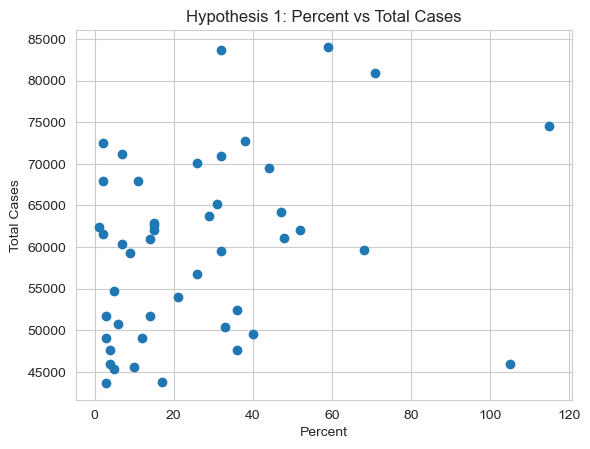

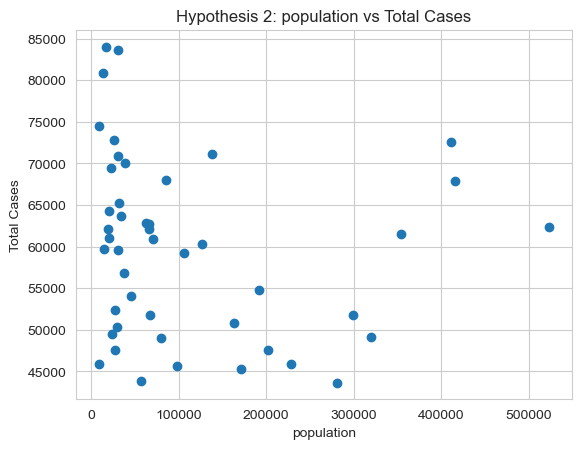

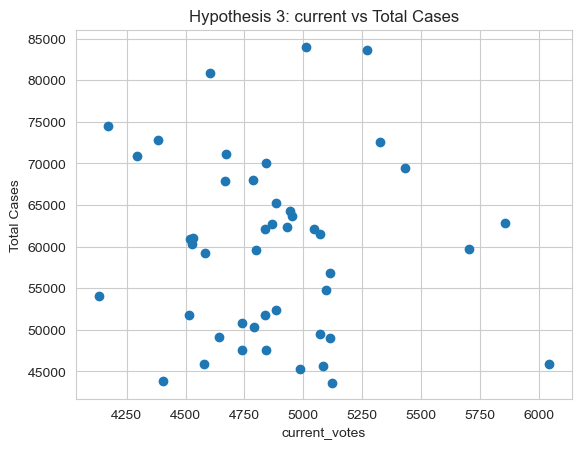

In [28]:
# Plotting
plt.scatter(selected_columns_1['percent'], selected_columns_1['total_cases'])
plt.title('Hypothesis 1: Percent vs Total Cases')
plt.xlabel('Percent')
plt.ylabel('Total Cases')
plt.show()

plt.scatter(selected_columns_1['population'], selected_columns_1['total_cases'])
plt.title('Hypothesis 2: population vs Total Cases')
plt.xlabel('population')
plt.ylabel('Total Cases')
plt.show()

plt.scatter(selected_columns_1['current_votes'], selected_columns_1['total_cases'])
plt.title('Hypothesis 3: current vs Total Cases')
plt.xlabel('current_votes')
plt.ylabel('Total Cases')
plt.show()

Scatter plot of Total Cases vs Percentage:
* plot shows the relationship between the total number of cases and the percentage variable. 
* Each point represents a county, with the x-coordinate indicating the percentage and the y-coordinate indicating the total number of cases.
* From this plot, it appears that there is no clear linear relationship between the percentage and the total number of cases. The points are scattered across the plot, suggesting that there may not be a strong correlation between these two variables.

Scatter plot of Total Cases vs Population:
* plot shows the relationship between the total number of cases and the population variable. 
* Each point represents a county, with the x-coordinate indicating the population and the y-coordinate indicating the total number of cases.
* Similar to the previous plot, there doesn't seem to be a clear linear relationship between population and total cases. The points are scattered, indicating that the total number of cases does not necessarily increase with population size.

Scatter plot of Total Cases vs Current Votes:
* plot shows the relationship between the total number of cases and the current votes variable. 
* Each point represents a county, with the x-coordinate indicating the current votes and the y-coordinate indicating the total number of cases.
* Again, there doesn't appear to be a strong linear relationship between current votes and total cases. The points are spread out across the plot, suggesting that there isn't a clear correlation between these two variables.

In summary, based on the scatter plots, there doesn't seem to be a straightforward linear relationship between any of the variables (percentage, population, current votes) and the total number of cases. This indicates that other factors or variables may be influencing the total number of cases in these counties.

In [29]:

# Hypothesis 1: Correlation between percent and total_cases
pearson_corr1, p_value1 = stats.pearsonr(selected_columns_1['percent'], selected_columns_1['total_cases'])
print("Hypothesis 1:Correlation between percent and total_cases")
print("Correlation Coefficient (Pearson):", pearson_corr1)
print("P-value:", p_value1)
if p_value1 < 0.05:
    print("Reject Null Hypothesis")
    print("There is a significant correlation between the percentage of votes and the number of COVID-19 cases.")
else:
    print("Fail to Reject Null Hypothesis")
    print("There is no significant correlation between the percentage of votes and the number of COVID-19 cases.")

# Hypothesis 2: Correlation between population and total_cases
pearson_corr2, p_value2 = stats.pearsonr(selected_columns_1['population'], selected_columns_1['total_cases'])
print("\nHypothesis 2:Correlation between population and total_cases")
print("Correlation Coefficient (Pearson):", pearson_corr2)
print("P-value:", p_value2)
if p_value2 < 0.05:
    print("Reject Null Hypothesis")
    print("There is a significant correlation between population size and the number of COVID-19 cases.")
else:
    print("Fail to Reject Null Hypothesis")
    print("There is no significant correlation between population size and the number of COVID-19 cases.")

# Hypothesis 3: Correlation between current_votes and total_cases
pearson_corr3, p_value3 = stats.pearsonr(selected_columns_1['current_votes'], selected_columns_1['total_cases'])
print("\nHypothesis 3:Correlation between current_votes and total_cases")
print("Correlation Coefficient (Pearson):", pearson_corr3)
print("P-value:", p_value3)
if p_value3 < 0.05:
    print("Reject Null Hypothesis")
    print("There is a significant correlation between current votes and the number of COVID-19 cases.")
else:
    print("Fail to Reject Null Hypothesis")
    print("There is no significant correlation between current votes and the number of COVID-19 cases.")


Hypothesis 1:Correlation between percent and total_cases
Correlation Coefficient (Pearson): 0.30790593980063163
P-value: 0.03736793932662478
Reject Null Hypothesis
There is a significant correlation between the percentage of votes and the number of COVID-19 cases.

Hypothesis 2:Correlation between population and total_cases
Correlation Coefficient (Pearson): -0.14927730788577087
P-value: 0.32210231245209786
Fail to Reject Null Hypothesis
There is no significant correlation between population size and the number of COVID-19 cases.

Hypothesis 3:Correlation between current_votes and total_cases
Correlation Coefficient (Pearson): -0.0645527250235205
P-value: 0.6699519702721195
Fail to Reject Null Hypothesis
There is no significant correlation between current votes and the number of COVID-19 cases.


### Depending on your type of data you can also perform Chi-square test for categorical hypothesis testing.


In [30]:


# Hypothesis 1: Correlation between percent and total_cases
contingency_table_1 = pd.crosstab(selected_columns_1['percent'], selected_columns_1['total_cases'])
chi2_stat_1, p_value_1, dof_1, expected_1 = chi2_contingency(contingency_table_1)
print("\nHypothesis 1:Correlation between percent and total_cases")
print("Chi-square Statistic:", chi2_stat_1)
print("P-value:", p_value_1)
if p_value_1 < 0.05:
    print("Reject Null Hypothesis: There is a significant association between percent and total_cases.")
else:
    print("Accept Null Hypothesis: There is no significant association between percent and total_cases.")

# Hypothesis 2: Correlation between population and total_cases
contingency_table_2 = pd.crosstab(selected_columns_1['population'], selected_columns_1['total_cases'])
chi2_stat_2, p_value_2, dof_2, expected_2 = chi2_contingency(contingency_table_2)
print("\nHypothesis 2:Correlation between population and total_cases")
print("Chi-square Statistic:", chi2_stat_2)
print("P-value:", p_value_2)
if p_value_2 < 0.05:
    print("Reject Null Hypothesis: There is a significant association between population and total_cases.")
else:
    print("Accept Null Hypothesis: There is no significant association between population and total_cases.")

# Hypothesis 3: Correlation between current_votes and total_cases
contingency_table_3 = pd.crosstab(selected_columns_1['current_votes'], selected_columns_1['total_cases'])
chi2_stat_3, p_value_3, dof_3, expected_3 = chi2_contingency(contingency_table_3)
print("\nHypothesis 3:Correlation between current_votes and total_cases")
print("Chi-square Statistic:", chi2_stat_3)
print("P-value:", p_value_3)
if p_value_3 < 0.05:
    print("Reject Null Hypothesis: There is a significant association between current_votes and total_cases.")
else:
    print("Accept Null Hypothesis: There is no significant association between current_votes and total_cases.")



Hypothesis 1:Correlation between percent and total_cases
Chi-square Statistic: 1426.0
P-value: 0.2758546840156226
Accept Null Hypothesis: There is no significant association between percent and total_cases.

Hypothesis 2:Correlation between population and total_cases
Chi-square Statistic: 2070.0
P-value: 0.2381108916997186
Accept Null Hypothesis: There is no significant association between population and total_cases.

Hypothesis 3:Correlation between current_votes and total_cases
Chi-square Statistic: 2023.9999999999995
P-value: 0.24050858468662265
Accept Null Hypothesis: There is no significant association between current_votes and total_cases.


### you can also make 3 new hypotheses and do hypothesis tests on them.

Hypothesis 4:

Null Hypothesis (H0): There is no significant correlation between the percentage of votes in the Senate county dataset and the population size of counties.
Alternative Hypothesis (H1): There is a significant correlation between the percentage of votes in the Senate county dataset and the population size of counties.
Variables: percent (from Senate county dataset) and population (from US COVID dataset)

Hypothesis 5:

Null Hypothesis (H0): There is no significant correlation between the number of COVID-19 cases and the number of votes in the Senate county dataset.
Alternative Hypothesis (H1): There is a significant correlation between the number of COVID-19 cases and the number of votes in the Senate county dataset.
Variables: total_cases (from US COVID dataset) and total_votes (from Senate county dataset)

hypothesis 6:

Null Hypothesis (H0): There is no significant correlation between the number of new COVID-19 cases and the percentage of votes in the Senate county dataset.
Alternative Hypothesis (H1): There is a significant correlation between the number of new COVID-19 cases and the percentage of votes in the Senate county dataset.
Variables: new_cases (from US COVID dataset) and percent (from Senate county dataset)

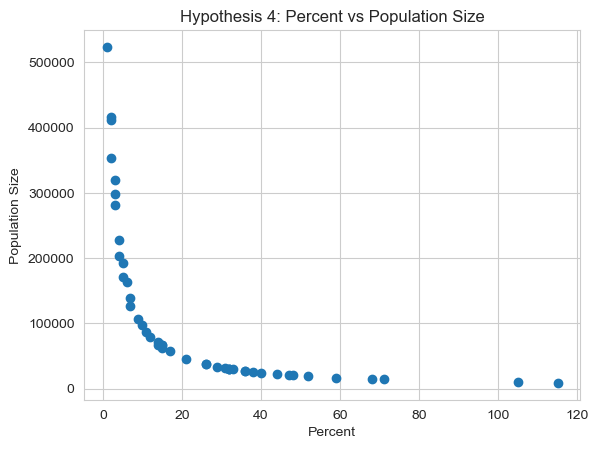

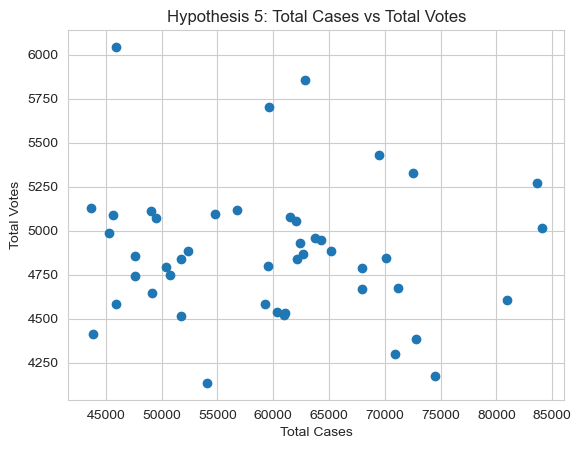

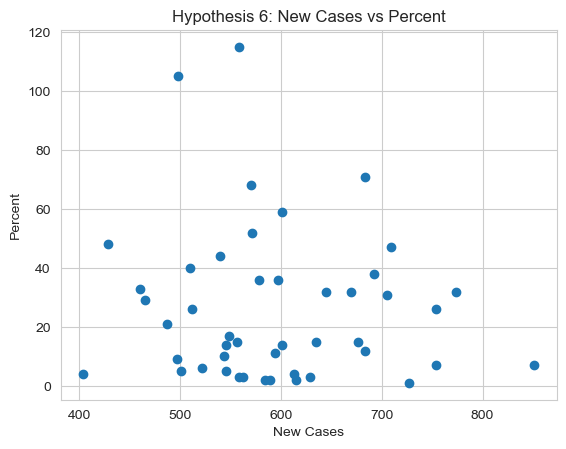

In [31]:
# Hypothesis 4
plt.scatter(selected_columns_1['percent'], selected_columns_1['population'])
plt.title('Hypothesis 4: Percent vs Population Size')
plt.xlabel('Percent')
plt.ylabel('Population Size')
plt.show()

# Hypothesis 5
plt.scatter(selected_columns_1['total_cases'], selected_columns_1['total_votes'])
plt.title('Hypothesis 5: Total Cases vs Total Votes')
plt.xlabel('Total Cases')
plt.ylabel('Total Votes')
plt.show()

# Hypothesis 6
plt.scatter(selected_columns_1['new_cases'], selected_columns_1['percent'])
plt.title('Hypothesis 6: New Cases vs Percent')
plt.xlabel('New Cases')
plt.ylabel('Percent')
plt.show()

Percentage vs. Population Scatter Plot:
* plot helps visualize the relationship between the percentage value (e.g., voter turnout) and the population size of each county.
* it  suggest how percentage values relate to the population size. higher population areas might have lower percentages due to logistical challenges or higher voter apathy.
* The plot can also highlight outliers, indicating counties with unusual voting patterns relative to their population sizes.

Total Cases vs. Total Votes Scatter Plot:
* This plot examines the relationship between the total number of COVID-19 cases and the total votes cast in each county.
* It helps identify if there's any correlation or relationship between COVID-19 cases and voter turnout.
* Counties with high COVID-19 cases and high voter turnout might indicate regions where public health concerns did not significantly affect voting behavior, or it could suggest a higher level of civic engagement despite the pandemic.

New Cases vs. Percentage Scatter Plot:
* This plot investigates the relationship between the number of new COVID-19 cases and the percentage value (e.g., voter turnout).
* It helps understand if there's any connection between recent COVID-19 trends and civic participation.
* Higher new cases alongside a high percentage could indicate regions where the pandemic's impact is influencing civic activities, or it might suggest areas with active public health concerns leading to increased engagement in voting or other activities.

In [32]:

# Hypothesis 4
corr_4, p_value_4 = pearsonr(selected_columns_1['percent'], selected_columns_1['population'])
# Hypothesis 5
corr_5, p_value_5 = pearsonr(selected_columns_1['total_cases'], selected_columns_1['total_votes'])
# Hypothesis 6
corr_6, p_value_6 = pearsonr(selected_columns_1['new_cases'], selected_columns_1['percent'])

# Hypothesis 4
if p_value_4 < 0.05:
    print("\nHypothesis 4:Correlation between percent and population")
    print("Reject Null Hypothesis")
    print("Correlation Coefficient (Pearson):", corr_4)
    print("P-value:", p_value_4)
    print("There is a significant correlation between the percentage of votes and the population size of counties.")
else:
    print("\nHypothesis 4:Correlation between percent and population")
    print("Fail to Reject Null Hypothesis")
    print("Correlation Coefficient (Pearson):", corr_4)
    print("P-value:", p_value_4)
    print("There is no significant correlation between the percentage of votes and the population size of counties.")

# Hypothesis 5
if p_value_5 < 0.05:
    print("\nHypothesis 5:Correlation between total_cases and total_votes")
    print("Reject Null Hypothesis")
    print("Correlation Coefficient (Pearson):", corr_5)
    print("P-value:", p_value_5)
    print("There is a significant correlation between the number of COVID-19 cases and the number of votes.")
else:
    print("\nHypothesis 5:Correlation between total_cases and total_votes")
    print("Fail to Reject Null Hypothesis")
    print("Correlation Coefficient (Pearson):", corr_5)
    print("P-value:", p_value_5)
    print("There is no significant correlation between the number of COVID-19 cases and the number of votes.")

# Hypothesis 6
if p_value_6 < 0.05:
    print("\nHypothesis 6:Correlation between new_cases and percent")
    print("Reject Null Hypothesis")
    print("Correlation Coefficient (Pearson):", corr_6)
    print("P-value:", p_value_6)
    print("There is a significant correlation between the number of new COVID-19 cases and the percentage of votes.")
else:
    print("\nHypothesis 6:Correlation between new_cases and percent")
    print("Fail to Reject Null Hypothesis")
    print("Correlation Coefficient (Pearson):", corr_6)
    print("P-value:", p_value_6)
    print("There is no significant correlation between the number of new COVID-19 cases and the percentage of votes.")


Hypothesis 4:Correlation between percent and population
Reject Null Hypothesis
Correlation Coefficient (Pearson): -0.6153368409885815
P-value: 5.3436821393646535e-06
There is a significant correlation between the percentage of votes and the population size of counties.

Hypothesis 5:Correlation between total_cases and total_votes
Fail to Reject Null Hypothesis
Correlation Coefficient (Pearson): -0.0668300719266458
P-value: 0.6590077983395415
There is no significant correlation between the number of COVID-19 cases and the number of votes.

Hypothesis 6:Correlation between new_cases and percent
Fail to Reject Null Hypothesis
Correlation Coefficient (Pearson): -0.09094777689526769
P-value: 0.5477667166429377
There is no significant correlation between the number of new COVID-19 cases and the percentage of votes.


In [33]:


# Example: Hypothesis 4: Correlation between percent and population
# Create a contingency table
contingency_table = pd.crosstab(selected_columns_1['percent'], selected_columns_1['population'])

# Hypothesis 4: Chi-square test for independence
chi2_stat, p_value_4, dof, expected = chi2_contingency(contingency_table)
print("Hypothesis 4:Correlation between percent and population")
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_value_4)
if p_value_4 < 0.05:
    print("Reject Null Hypothesis: There is a significant association between percent and population.")
else:
    print("Accept Null Hypothesis: There is no significant association between percent and population.")
    
# Example: Hypothesis 5: Correlation between total_cases and total_votes
# Create a contingency table
contingency_table_5 = pd.crosstab(selected_columns_1['total_cases'], selected_columns_1['total_votes'])

# Hypothesis 5: Chi-square test for independence
chi2_stat_5, p_value_5, dof_5, expected_5 = chi2_contingency(contingency_table_5)
print("\nHypothesis 5:Correlation between total_cases and total_votes")
print("Chi-square Statistic:", chi2_stat_5)
print("P-value:", p_value_5)
if p_value_5 < 0.05:
    print("Reject Null Hypothesis: There is a significant association between total_cases and total_votes.")
else:
    print("Accept Null Hypothesis: There is no significant association between total_cases and total_votes.")

# Example: Hypothesis 6: Correlation between new_cases and percent
# Create a contingency table
contingency_table_6 = pd.crosstab(selected_columns_1['new_cases'], selected_columns_1['percent'])

# Hypothesis 6: Chi-square test for independence
chi2_stat_6, p_value_6, dof_6, expected_6 = chi2_contingency(contingency_table_6)
print("\nHypothesis 6:Correlation between new_cases and percent")
print("Chi-square Statistic:", chi2_stat_6)
print("P-value:", p_value_6)
if p_value_6 < 0.05:
    print("Reject Null Hypothesis: There is a significant association between new_cases and percent.")
else:
    print("Accept Null Hypothesis: There is no significant association between new_cases and percent.")


Hypothesis 4:Correlation between percent and population
Chi-square Statistic: 1426.0
P-value: 0.2758546840156226
Accept Null Hypothesis: There is no significant association between percent and population.

Hypothesis 5:Correlation between total_cases and total_votes
Chi-square Statistic: 2023.9999999999998
P-value: 0.24050858468662153
Accept Null Hypothesis: There is no significant association between total_cases and total_votes.

Hypothesis 6:Correlation between new_cases and percent
Chi-square Statistic: 1268.8333333333333
P-value: 0.27829257336710594
Accept Null Hypothesis: There is no significant association between new_cases and percent.


### For each of the aforemention analysis plot figures, the figures should include (10 points)
#### - trend line (based on the datasets from 2020.06.01 (Monday) to 2021.01.03 (Sunday)).
#### - prediction path (forecast 1 week).
#### - confidence intervals (error in prediction)

In [34]:
def plot_county_regression(data, county, X, y, y_pred, title, confidence_interval=None, forecast_dates=None, forecast_values=None):
    plt.figure(figsize=(12, 6))
    county_data = data[data['County Name'] == county]
    plt.plot(X, y, label='Actual',color='blue')
    plt.plot(X, y_pred, label='Trend Line',color='green')
    if confidence_interval is not None:
        plt.fill_between(X.flatten(), confidence_interval[:, 0], confidence_interval[:, 1], alpha=0.4, color='red', label='95% Confidence Interval')
    if forecast_dates is not None and forecast_values is not None:
        plt.plot(forecast_dates, forecast_values, label='1-week Forecast', color='orange')
    plt.xlabel('Number of Days')
    plt.ylabel(title)
    plt.title(f'{title} Trend, Prediction, and Confidence Intervals - {county}')
    plt.legend()
    plt.show()
    

    # Function to fit polynomial regression model
def fit_polynomial_regression(X, y, degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = linear_reg(X_poly, y)
    return model, poly

* plot_county_regression: Plots actual and predicted COVID-19 data for a county, showing trend and forecast if available.
* fit_polynomial_regression: Fits a polynomial regression model to COVID-19 data for prediction.

In [35]:
def calc_confidence_intervals(model, X, y, confidence_level=0.95):
    y_pred = model.predict(X)
    n = len(y_pred)
    dof = n - model.coef_.shape[0] - 1
    mse = mean_squared_error(y, y_pred)
    t_score = st.t.ppf((1 + confidence_level) / 2, dof)
    margin_of_error = t_score * np.sqrt(mse * (1/n + (X - X.mean())**2 / np.sum((X - X.mean())**2)))
    lower_bound = y_pred - margin_of_error
    upper_bound = y_pred + margin_of_error
    return np.column_stack((lower_bound, upper_bound))

def calc_conf_intervals_poly(model, X, poly, y, confidence_level=0.95):
    X_poly = poly.transform(X)
    y_pred = model.predict(X_poly)
    n = len(y_pred)
    dof = n - model.coef_.shape[0] - 1
    mse = mean_squared_error(y, y_pred)
    t_score = st.t.ppf((1 + confidence_level) / 2, dof)
    margin_of_error = t_score * np.sqrt(mse * (1/n + (X_poly - X_poly.mean())**2 / np.sum((X_poly - X_poly.mean())**2)))
    lower_bound = y_pred - margin_of_error[:, 0]
    upper_bound = y_pred + margin_of_error[:, 1]
    return np.column_stack((lower_bound, upper_bound))


* calc_confidence_intervals: Computes confidence intervals for linear regression predictions using the t-distribution.
* calc_conf_intervals_poly: Computes confidence intervals for polynomial regression predictions by transforming the input and applying the same methodology.

In [36]:
SC_data= SC_df.groupby('Date')[['new_cases', 'new_deaths']].sum().reset_index()
SC_data

,Date,new_cases,new_deaths
0,2020-06-01,0.0,0.0
1,2020-06-02,269.0,1.0
2,2020-06-03,235.0,17.0
3,2020-06-04,349.0,7.0
4,2020-06-05,445.0,13.0
...,...,...,...
212,2020-12-30,2873.0,51.0
213,2020-12-31,4032.0,47.0
214,2021-01-01,0.0,0.0
215,2021-01-02,5211.0,88.0


* Two polynomial regression models are fitted to the data: one for new cases (y_val1) and one for new deaths (y_val2), both with a degree of 3.
* The polynomial models are used to predict new cases (y_pred_poly_cases) and new deaths (y_pred_poly_deaths) for the entire state based on the provided input (x_val).
* The Root Mean Squared Error (RMSE) is calculated for both the new cases (rmse_cases) and new deaths (rmse_deaths) predictions to measure the model's performance.
* Confidence intervals are computed for the polynomial regression predictions of new cases (confidence_interval_cases) and new deaths (confidence_interval_deaths) using the provided polynomial models, input data (x_val), and polynomial features (poly_features_cases).

This code fits polynomial regression models to the provided data, makes predictions, evaluates the models' performance using RMSE, and computes confidence intervals for the predictions.

In [37]:
def plot_reg_results(x, y, y_pred, title, confidence_interval=None, forecast_dates=None, forecast_values=None):
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, label='Actual',color='blue')
    plt.plot(x, y_pred, label='Trend Line',color='green')
    if confidence_interval is not None:
        plt.fill_between(x.flatten(), confidence_interval[:, 0], confidence_interval[:, 1], alpha=0.4, color='red', label='95% Confidence Interval')
    if forecast_dates is not None and forecast_values is not None:
        plt.plot(forecast_dates, forecast_values, label='1-week Forecast', color='orange')
    plt.xlabel('Number of Days')
    plt.ylabel(title)
    plt.title(f'{title} Trend, Prediction, and Confidence Intervals')
    plt.legend()
    plt.show() 
confidence_interval_c= calc_confidence_intervals(lm_cases, x_val, y_val1)
confidence_interval_d= calc_confidence_intervals(lm_deaths, x_val, y_val2)


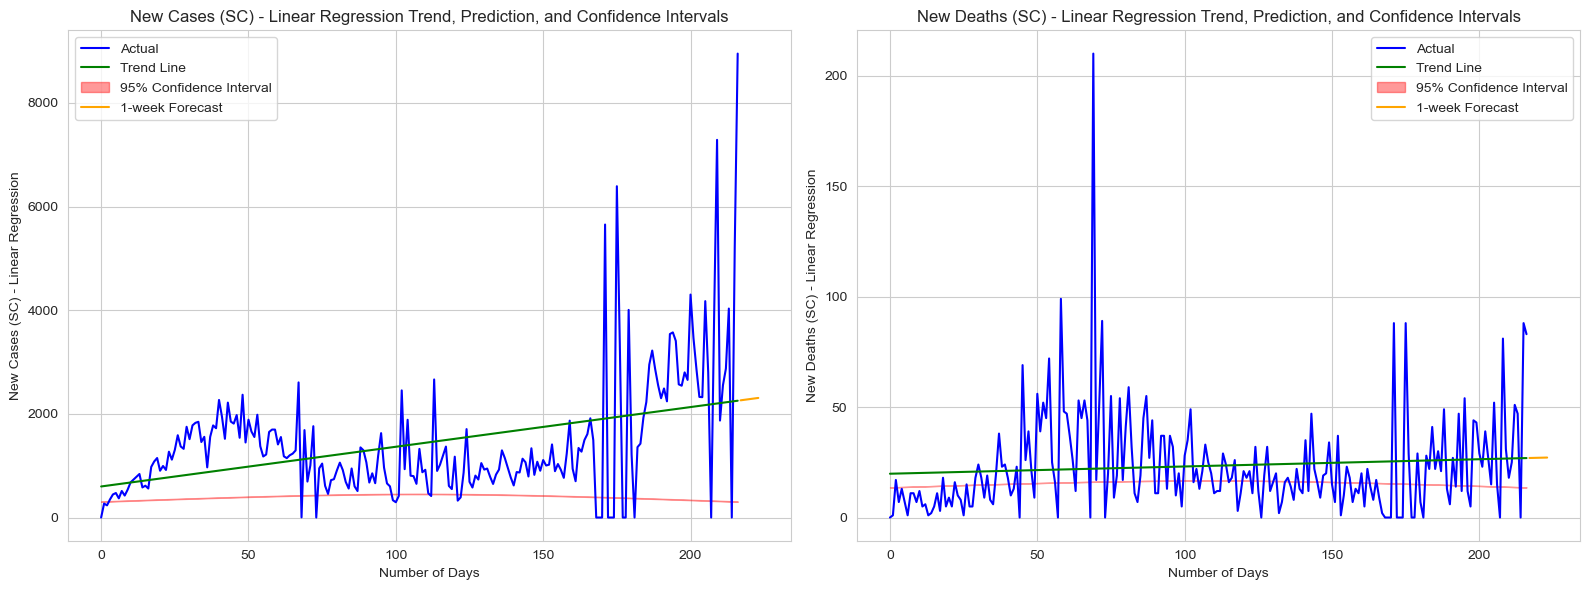

In [38]:
def plot_reg_results_subplots(x, y, y_pred, title, confidence_interval=None, forecast_dates=None, forecast_values=None, subplot_title=None, subplot_color=None):
    plt.plot(x, y, label='Actual', color='blue')
    plt.plot(x, y_pred, label='Trend Line', color='green')
    if confidence_interval is not None:
        plt.fill_between(x.flatten(), confidence_interval[:, 0], confidence_interval[:, 1], alpha=0.4, color='red', label='95% Confidence Interval')
    if forecast_dates is not None and forecast_values is not None:
        plt.plot(forecast_dates, forecast_values, label='1-week Forecast', color='orange')
    plt.xlabel('Number of Days')
    plt.ylabel(title)
    plt.title(f'{title} Trend, Prediction, and Confidence Intervals')
    plt.legend()

def plot_reg_results_with_subplots(x_vals, y_vals, y_pred_vals, titles, confidence_intervals=None, forecast_dates=None, forecast_values=None, subplot_titles=None, subplot_colors=None):
    num_plots = len(x_vals)
    num_rows = (num_plots + 1) // 2
    num_cols = 2 if num_plots > 1 else 1
    
    plt.figure(figsize=(16, 6 * num_rows))

    for i in range(num_plots):
        plt.subplot(num_rows, num_cols, i + 1)
        plot_reg_results_subplots(x_vals[i], y_vals[i], y_pred_vals[i], titles[i], confidence_intervals[i], forecast_dates[i], forecast_values[i], subplot_titles[i], subplot_colors[i])

    plt.tight_layout()
    plt.show()
    
plot_reg_results_with_subplots(
    [x_val, x_val],
    [y_val1, y_val2],
    [y_pred_lm_cases, y_pred_lm_deaths],
    ['New Cases (SC) - Linear Regression', 'New Deaths (SC) - Linear Regression'],
    [confidence_interval_c, confidence_interval_d],
    [x_val[-1] + np.arange(1, 8).reshape(-1, 1), x_val[-1] + np.arange(1, 8).reshape(-1, 1)],
    [lm_cases.predict(x_val[-1] + np.arange(1, 8).reshape(-1, 1)), lm_deaths.predict(x_val[-1] + np.arange(1, 8).reshape(-1, 1))],
    subplot_titles=['New Cases', 'New Deaths'],
    subplot_colors=['blue', 'orange']
)


* Plots regression results for a single subplot with actual and predicted data, confidence intervals, and forecasts if available.
* Generates multiple subplots arranged in a grid layout, each displaying regression results for different data sets.
* Iterates through each subplot, calling plot_reg_results_subplots to plot the respective data.
* x_vals: List of independent variable data for each subplot.
* y_vals: List of actual dependent variable data for each subplot.
* y_pred_vals: List of predicted dependent variable data for each subplot.
* titles: List of titles for each subplot.
* confidence_intervals: List of confidence intervals for each subplot (optional).
* forecast_dates: List of forecast dates for each subplot (optional).
* forecast_values: List of forecasted values for each subplot (optional).
* subplot_titles: List of subplot titles (optional).
* subplot_colors: List of colors for each subplot (optional).

* The number of subplots is determined by the length of x_vals.
* Subplots are arranged in a grid layout with the number of rows calculated based on the number of subplots.

* Each subplot displays the actual data, predicted trend line, confidence intervals (if provided), and forecast (if available).

In [39]:
print(f"RMSE for Linear Regression (New Cases, SC): {rmse_lm_cases:.2f}")
print(f"RMSE for Linear Regression (New Deaths, SC): {rmse_lm_deaths:.2f}")

RMSE for Linear Regression (New Cases, SC): 1111.00
RMSE for Linear Regression (New Deaths, SC): 23.31


In [40]:
# Fitting polynomial regression models
degree = 3
poly_model_cases, poly_features_cases = fit_polynomial_regression(x_val, y_val1, degree)
poly_model_deaths, _ = fit_polynomial_regression(x_val, y_val2, degree)

# Predictions for the entire state
X_poly_cases = poly_features_cases.transform(x_val)
y_pred_poly_cases = poly_model_cases.predict(X_poly_cases)
y_pred_poly_deaths = poly_model_deaths.predict(X_poly_cases)

# Calculating RMSE for the dataset
rmse_cases = rmse_cal(y_val1, y_pred_poly_cases)
rmse_deaths =rmse_cal(y_val2, y_pred_poly_deaths)

# Calculating confidence intervals for Polynomial Regression
confidence_interval_cases =calc_conf_intervals_poly(poly_model_cases, x_val, poly_features_cases, y_val1)
confidence_interval_deaths =calc_conf_intervals_poly(poly_model_deaths, x_val, poly_features_cases, y_val2)

* Two polynomial regression models are fitted to the data: one for new cases (y_val1) and one for new deaths (y_val2), both with a degree of 3.
* The polynomial models are used to predict new cases (y_pred_poly_cases) and new deaths (y_pred_poly_deaths) for the entire state based on the provided input (x_val).
* The Root Mean Squared Error (RMSE) is calculated for both the new cases (rmse_cases) and new deaths (rmse_deaths) predictions to measure the model's performance.
* Confidence intervals are computed for the polynomial regression predictions of new cases (confidence_interval_cases) and new deaths (confidence_interval_deaths) using the provided polynomial models, input data (x_val), and polynomial features (poly_features_cases).

This code fits polynomial regression models to the provided data, makes predictions, evaluates the models' performance using RMSE, and computes confidence intervals for the predictions.

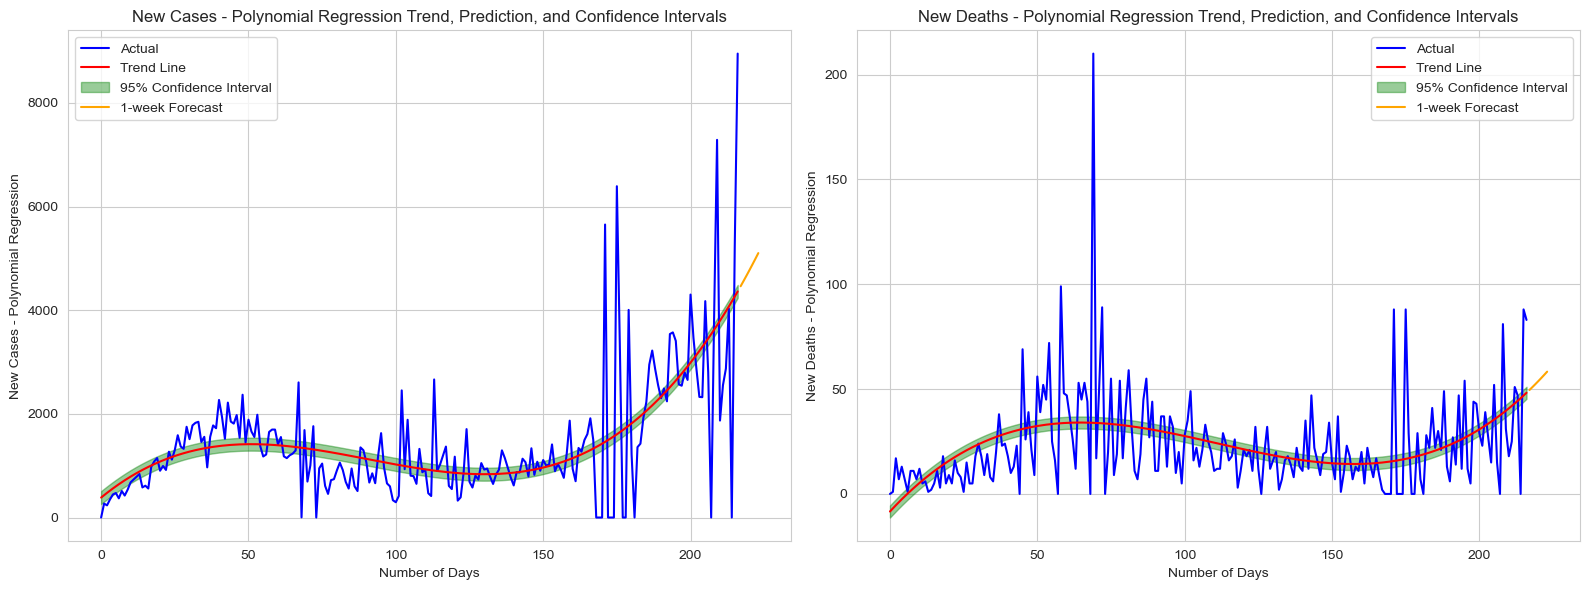

In [41]:
def plot_reg_results_poly_subplots(X, y, y_pred, title, poly, confidence_interval=None, forecast_dates=None, forecast_values=None, subplot_title=None, subplot_color=None):
    plt.plot(X, y, label='Actual', color='blue')
    plt.plot(X, y_pred, label='Trend Line', color='red')
    if confidence_interval is not None:
        X_poly = poly.transform(X)
        plt.fill_between(X.flatten(), confidence_interval[:, 0], confidence_interval[:, 1], alpha=0.4, color='green', label='95% Confidence Interval')
    if forecast_dates is not None and forecast_values is not None:
        forecast_dates_poly = poly.transform(forecast_dates)
        plt.plot(forecast_dates, forecast_values, label='1-week Forecast', color='orange')
    plt.xlabel('Number of Days')
    plt.ylabel(title)
    plt.title(f'{title} Trend, Prediction, and Confidence Intervals')
    plt.legend()

def plot_reg_results_poly_with_subplots(X_vals, y_vals, y_pred_vals, titles, polys, confidence_intervals=None, forecast_dates=None, forecast_values=None, subplot_titles=None, subplot_colors=None):
    num_plots = len(X_vals)
    num_rows = (num_plots + 1) // 2
    num_cols = 2 if num_plots > 1 else 1
    
    plt.figure(figsize=(16, 6 * num_rows))

    for i in range(num_plots):
        plt.subplot(num_rows, num_cols, i + 1)
        plot_reg_results_poly_subplots(X_vals[i], y_vals[i], y_pred_vals[i], titles[i], polys[i], confidence_intervals[i], forecast_dates[i], forecast_values[i], subplot_titles[i], subplot_colors[i])

    plt.tight_layout()
    plt.show()
plot_reg_results_poly_with_subplots(
    [x_val, x_val],
    [y_val1, y_val2],
    [y_pred_poly_cases, y_pred_poly_deaths],
    ['New Cases - Polynomial Regression', 'New Deaths - Polynomial Regression'],
    [poly_features_cases, poly_features_cases],
    [confidence_interval_cases, confidence_interval_deaths],
    [x_val[-1] + np.arange(1, 8).reshape(-1, 1), x_val[-1] + np.arange(1, 8).reshape(-1, 1)],
    [poly_model_cases.predict(poly_features_cases.transform(x_val[-1] + np.arange(1, 8).reshape(-1, 1))),
     poly_model_deaths.predict(poly_features_cases.transform(x_val[-1] + np.arange(1, 8).reshape(-1, 1)))],
    subplot_titles=['New Cases', 'New Deaths'],
    subplot_colors=['blue', 'orange']
)


* Plots polynomial regression results for a single subplot with actual and predicted data, confidence intervals, and forecasts if available.
* Generates multiple subplots arranged in a grid layout, each displaying polynomial regression results for different data sets.
* Iterates through each subplot, calling plot_reg_results_poly_subplots to plot the respective data.
* The number of subplots is determined by the length of X_vals.
* Subplots are arranged in a grid layout with the number of rows calculated based on the number of subplots.
* Each subplot displays the actual data, predicted trend line, confidence intervals (if provided), and forecast (if available).

In [42]:
print(f"RMSE for Polynomial Regression (New Cases): {rmse_cases:.2f}")
print(f"RMSE for Polynomial Regression (New Deaths): {rmse_deaths:.2f}")

RMSE for Polynomial Regression (New Cases): 919.90
RMSE for Polynomial Regression (New Deaths): 21.17


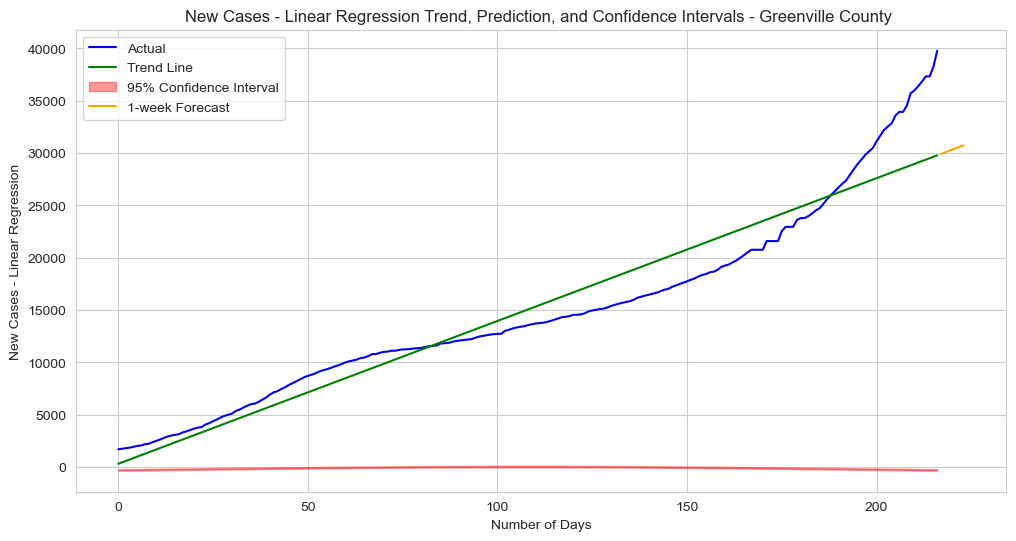

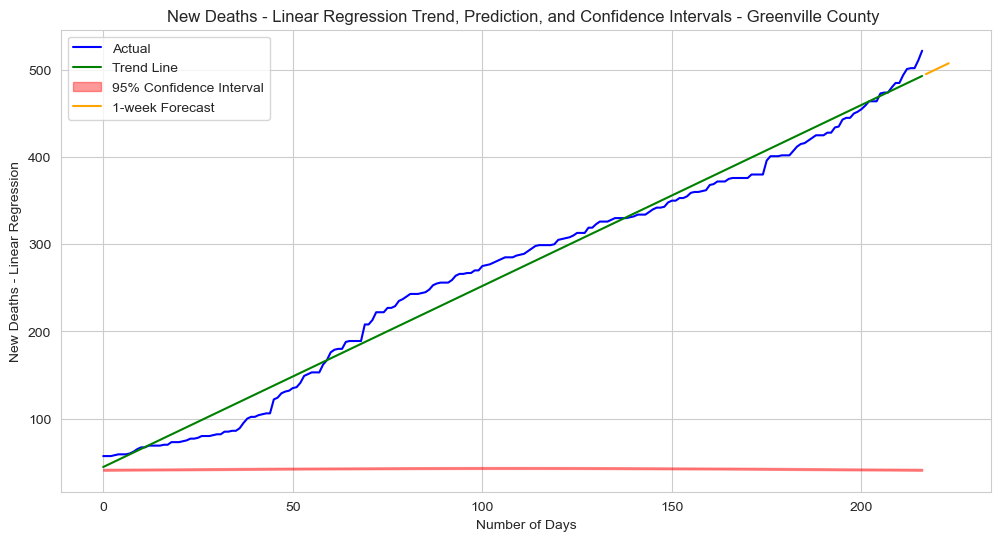

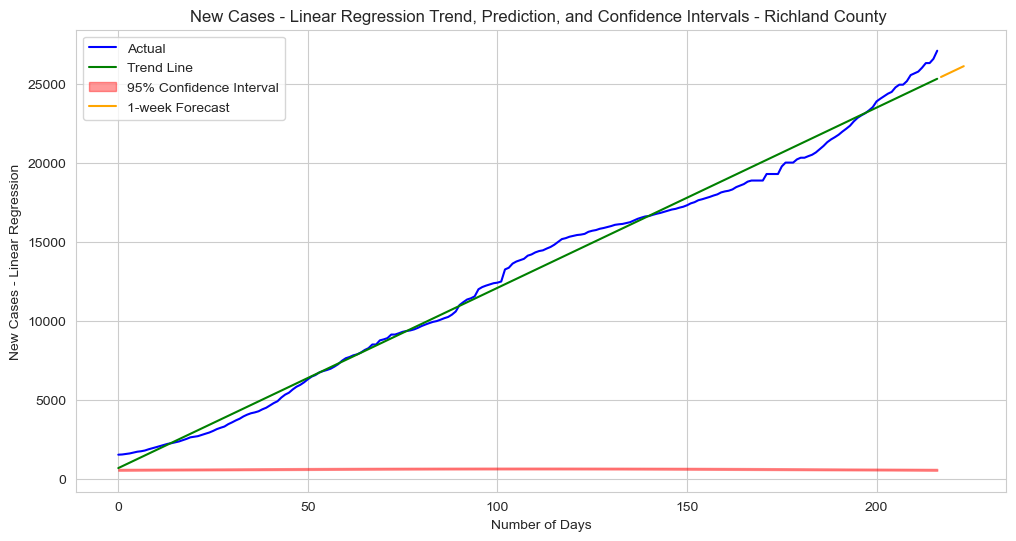

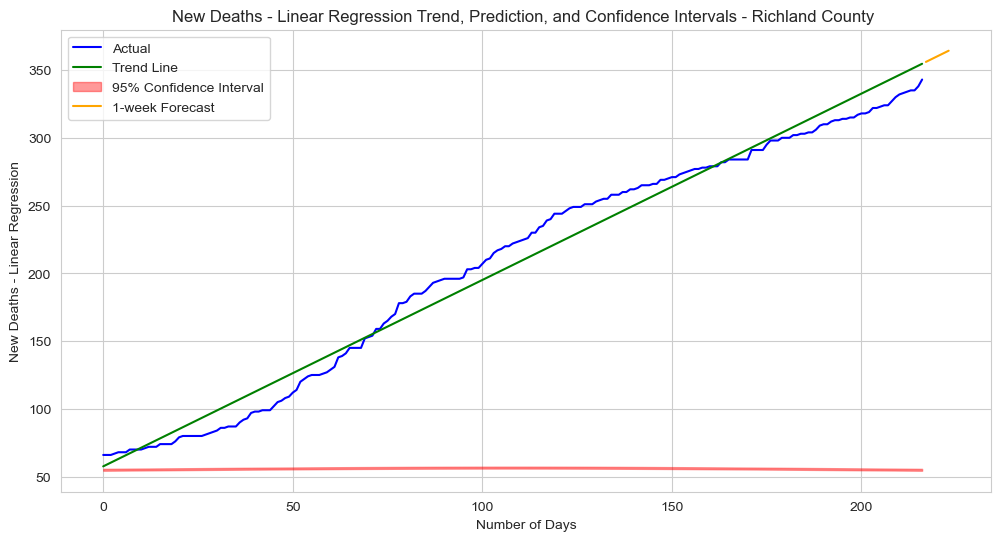

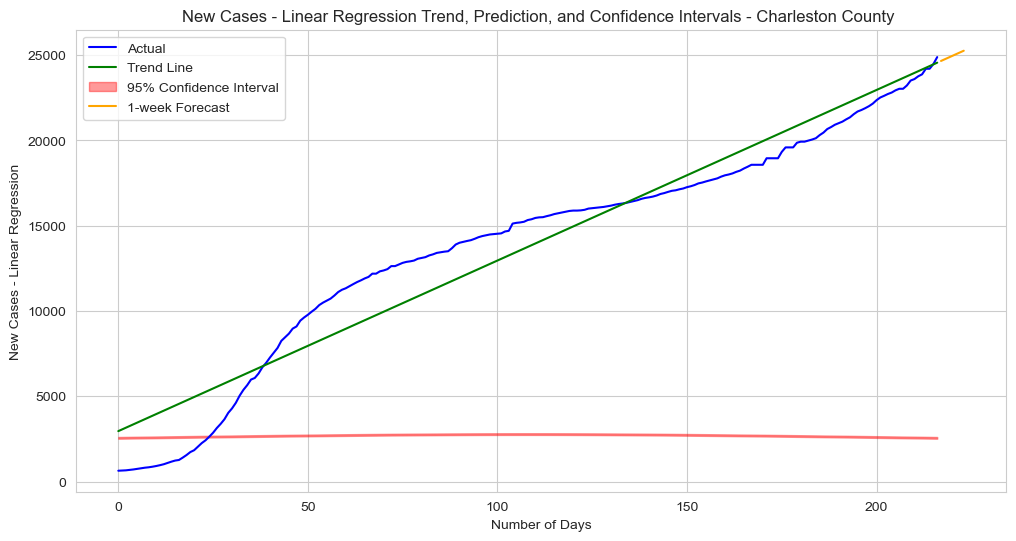

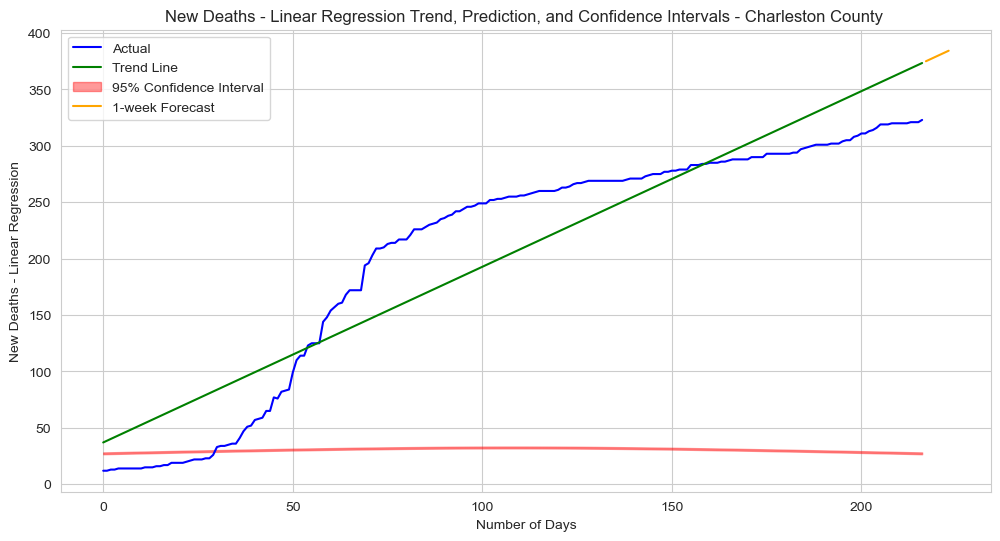

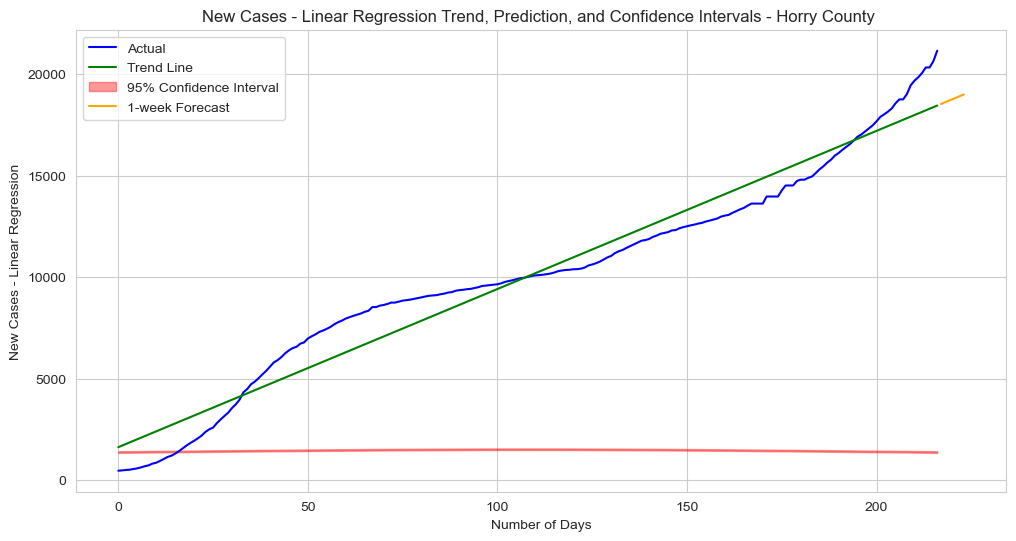

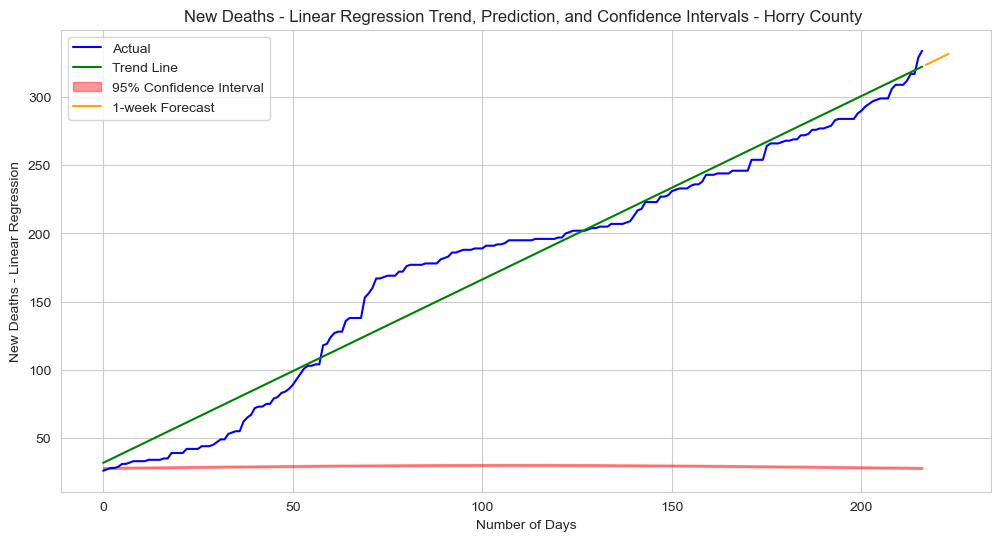

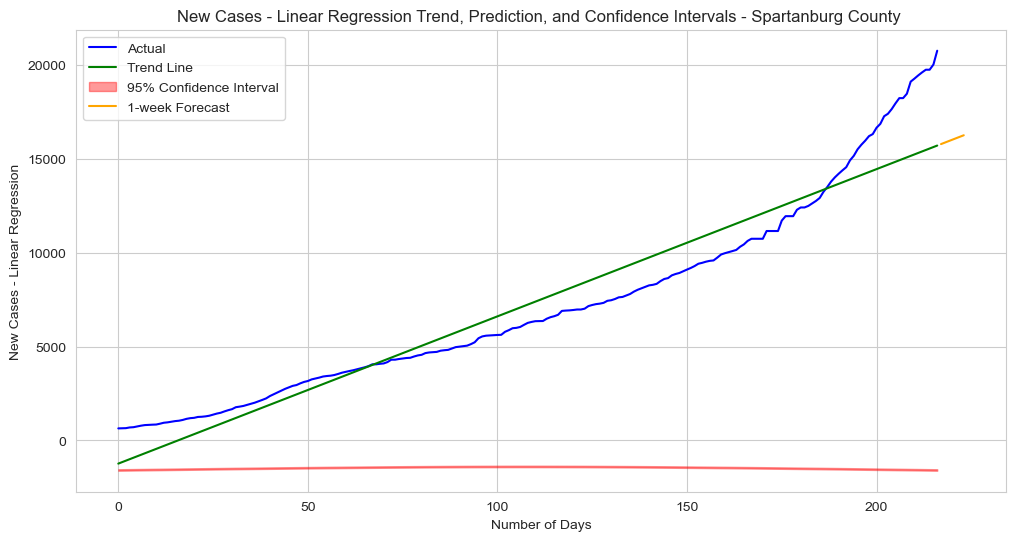

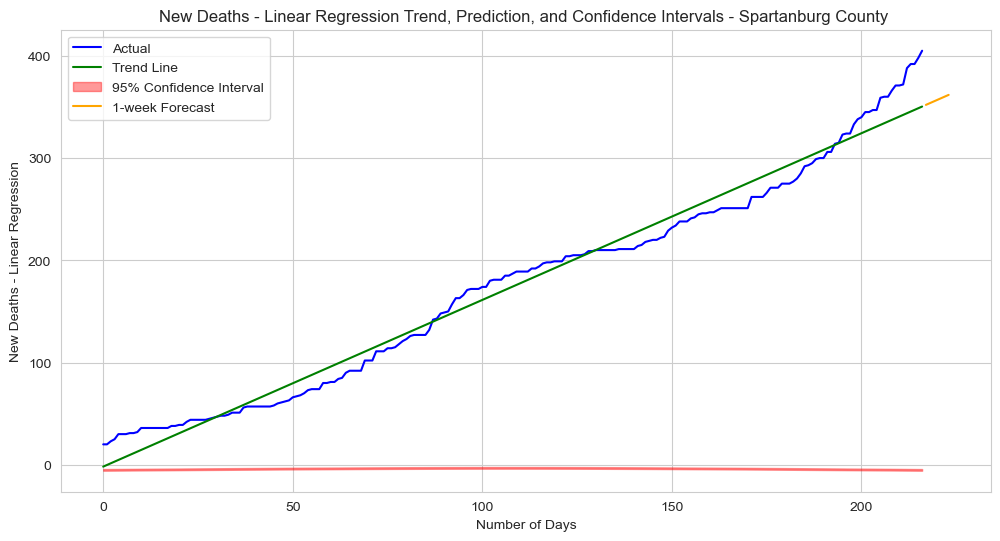

In [43]:
# Identify top 5 counties
top_counties_list = top_county_names

# Plotting regression results for each county
for county in top_counties_list:
    county_data = SC_df[SC_df['County Name'] == county]
    X_county = np.arange(len(county_data)).reshape(-1, 1)
    y_county_new_cases = county_data['Cases'].values
    y_county_new_deaths = county_data['Deaths'].values

    # Linear regression models
    linear_model_new_cases_county = linear_reg(X_county, y_county_new_cases)
    linear_model_new_deaths_county = linear_reg(X_county, y_county_new_deaths)
    
    # Predictions
    y_pred_linear_new_cases_county = linear_model_new_cases_county.predict(X_county)
    y_pred_linear_new_deaths_county = linear_model_new_deaths_county.predict(X_county)

    # Calculating RMSE for each county
    rmse_linear_new_cases_county =rmse_cal(y_county_new_cases, y_pred_linear_new_cases_county)
    rmse_linear_new_deaths_county =rmse_cal(y_county_new_deaths, y_pred_linear_new_deaths_county)
    
    # Calculating confidence intervals
    confidence_interval_new_cases_county = calc_confidence_intervals(linear_model_new_cases_county, X_county, y_county_new_cases)
    confidence_interval_new_deaths_county = calc_confidence_intervals(linear_model_new_deaths_county, X_county, y_county_new_deaths)

    # Plotting the results for each county with confidence intervals
    plot_county_regression(county_data, county, X_county, y_county_new_cases,
                           y_pred_linear_new_cases_county, 'New Cases - Linear Regression',
                           confidence_interval=confidence_interval_new_cases_county,
                           forecast_dates=X_county[-1] + np.arange(1, 8).reshape(-1, 1),
                           forecast_values=linear_model_new_cases_county.predict(X_county[-1] + np.arange(1, 8).reshape(-1, 1)))
    
    plot_county_regression(county_data, county, X_county, y_county_new_deaths,
                           y_pred_linear_new_deaths_county, 'New Deaths - Linear Regression',
                           confidence_interval=confidence_interval_new_deaths_county,
                           forecast_dates=X_county[-1] + np.arange(1, 8).reshape(-1, 1),
                           forecast_values=linear_model_new_deaths_county.predict(X_county[-1] + np.arange(1, 8).reshape(-1, 1)))


    
    print("\n===================================================================================================================")


* The variable top_counties_list presumably contains the names of the top 5 counties.
* Iterates over each county in top_counties_list.
* Extracts data for the current county from the DataFrame SC_df.
* Prepares the input data (X_county) and actual target data for new cases (y_county_new_cases) and deaths (y_county_new_deaths).
* Fits separate linear regression models for predicting new cases and new deaths for the current county.
* Uses the fitted models to predict new cases and new deaths for the current county.
* Calculates Root Mean Squared Error (RMSE) for each county.
* Computes confidence intervals for the linear regression predictions.
* Plots the regression results for each county with confidence intervals.
* Separate plots are created for new cases and new deaths.
* Prints a separator to distinguish between results for different counties.
This code conducts linear regression analysis for the top 5 counties, evaluates model performance, calculates confidence intervals, and plots the results with forecasts and confidence intervals.

In [44]:
# Identify top 5 counties
top_counties_list = top_county_names

# Plotting regression results for each county
for county in top_counties_list:
    county_data = SC_df[SC_df['County Name'] == county]
    X_county = np.arange(len(county_data)).reshape(-1, 1)
    y_county_new_cases = county_data['Cases'].values
    y_county_new_deaths = county_data['Deaths'].values

    # Linear regression models
    linear_model_new_cases_county = linear_reg(X_county, y_county_new_cases)
    linear_model_new_deaths_county = linear_reg(X_county, y_county_new_deaths)
    
    # Predictions
    y_pred_linear_new_cases_county = linear_model_new_cases_county.predict(X_county)
    y_pred_linear_new_deaths_county = linear_model_new_deaths_county.predict(X_county)

    # Calculating RMSE for each county
    rmse_linear_new_cases_county =rmse_cal(y_county_new_cases, y_pred_linear_new_cases_county)
    rmse_linear_new_deaths_county =rmse_cal(y_county_new_deaths, y_pred_linear_new_deaths_county)
    
    # Calculating confidence intervals
    confidence_interval_new_cases_county = calc_confidence_intervals(linear_model_new_cases_county, X_county, y_county_new_cases)
    confidence_interval_new_deaths_county = calc_confidence_intervals(linear_model_new_deaths_county, X_county, y_county_new_deaths)

    print(f"\n{county} County:")
    print(f"RMSE for Linear Regression (New Cases): {rmse_linear_new_cases_county:.2f}")
    print(f"RMSE for Linear Regression (New Deaths): {rmse_linear_new_deaths_county:.2f}")


Greenville County  County:
RMSE for Linear Regression (New Cases): 2494.66
RMSE for Linear Regression (New Deaths): 15.97

Richland County  County:
RMSE for Linear Regression (New Cases): 628.61
RMSE for Linear Regression (New Deaths): 12.06

Charleston County  County:
RMSE for Linear Regression (New Cases): 1665.22
RMSE for Linear Regression (New Deaths): 39.02

Horry County  County:
RMSE for Linear Regression (New Cases): 1049.83
RMSE for Linear Regression (New Deaths): 16.58

Spartanburg County  County:
RMSE for Linear Regression (New Cases): 1422.04
RMSE for Linear Regression (New Deaths): 15.02


* Greenville County has the highest RMSE for new cases among the listed counties.
* Richland County has the lowest RMSE for new cases.
* Charleston County has the highest RMSE for new deaths.
* Richland County has the lowest RMSE for new deaths.
* There is variability in RMSE values across counties for both new cases and new deaths.

In [45]:
# Plotting regression results for each county
for county in top_county_names:
    county_data = SC_df[SC_df['County Name'] == county]
    X_county = np.arange(len(county_data)).reshape(-1, 1)
    y_county_new_cases = county_data['Cases'].values
    y_county_new_deaths = county_data['Deaths'].values

    # Polynomial regression models
    poly_model_new_cases_county, poly_county = fit_polynomial_regression(X_county, y_county_new_cases, degree)
    poly_model_new_deaths_county, _ = fit_polynomial_regression(X_county, y_county_new_deaths, degree)

    # Predictions
    X_poly_county = poly_county.transform(X_county)
    y_pred_poly_new_cases_county = poly_model_new_cases_county.predict(X_poly_county)
    y_pred_poly_new_deaths_county = poly_model_new_deaths_county.predict(X_poly_county)

    # Calculating RMSE for each county
    rmse_poly_new_cases_county =rmse_cal(y_county_new_cases, y_pred_poly_new_cases_county)
    rmse_poly_new_deaths_county =rmse_cal(y_county_new_deaths, y_pred_poly_new_deaths_county)
    
    print(f"\n{county} County:")
    print(f"RMSE for Polynomial Regression (New Cases): {rmse_poly_new_cases_county:.2f}")
    print(f"RMSE for Polynomial Regression (New Deaths): {rmse_poly_new_deaths_county:.2f}")


Greenville County  County:
RMSE for Polynomial Regression (New Cases): 553.31
RMSE for Polynomial Regression (New Deaths): 14.31

Richland County  County:
RMSE for Polynomial Regression (New Cases): 608.48
RMSE for Polynomial Regression (New Deaths): 7.20

Charleston County  County:
RMSE for Polynomial Regression (New Cases): 631.92
RMSE for Polynomial Regression (New Deaths): 19.82

Horry County  County:
RMSE for Polynomial Regression (New Cases): 367.29
RMSE for Polynomial Regression (New Deaths): 12.13

Spartanburg County  County:
RMSE for Polynomial Regression (New Cases): 323.09
RMSE for Polynomial Regression (New Deaths): 12.65


* Horry County has the lowest RMSE for polynomial regression in new cases.
* Richland County has the lowest RMSE for polynomial regression in new deaths.
* Overall, polynomial regression tends to yield lower RMSE values compared to linear regression in this dataset.
* There is variation in RMSE values across counties for both new cases and new deaths.

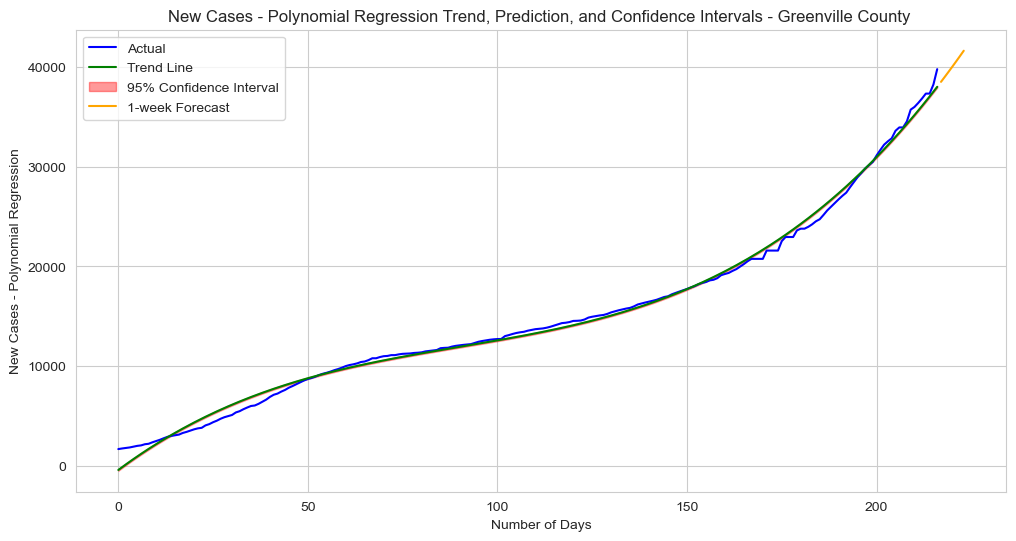

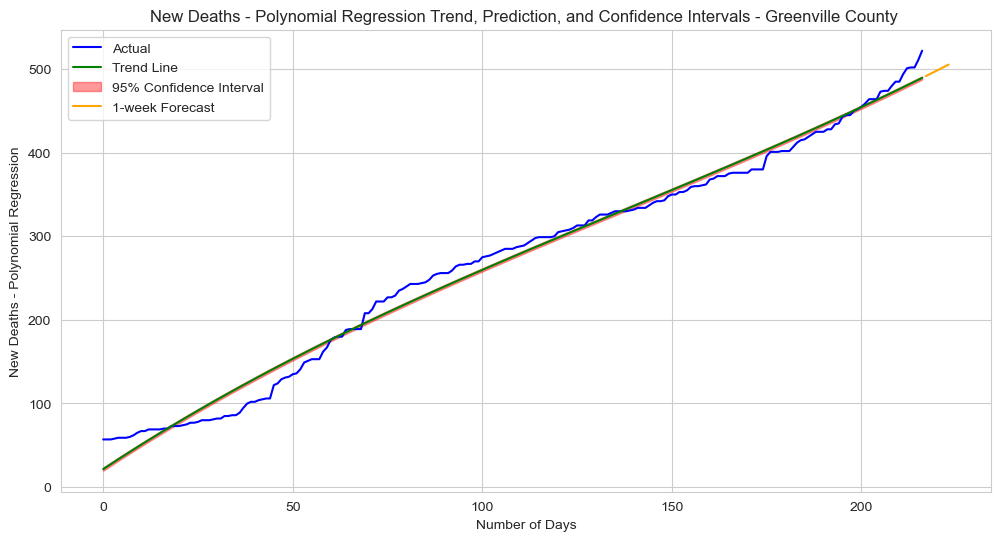

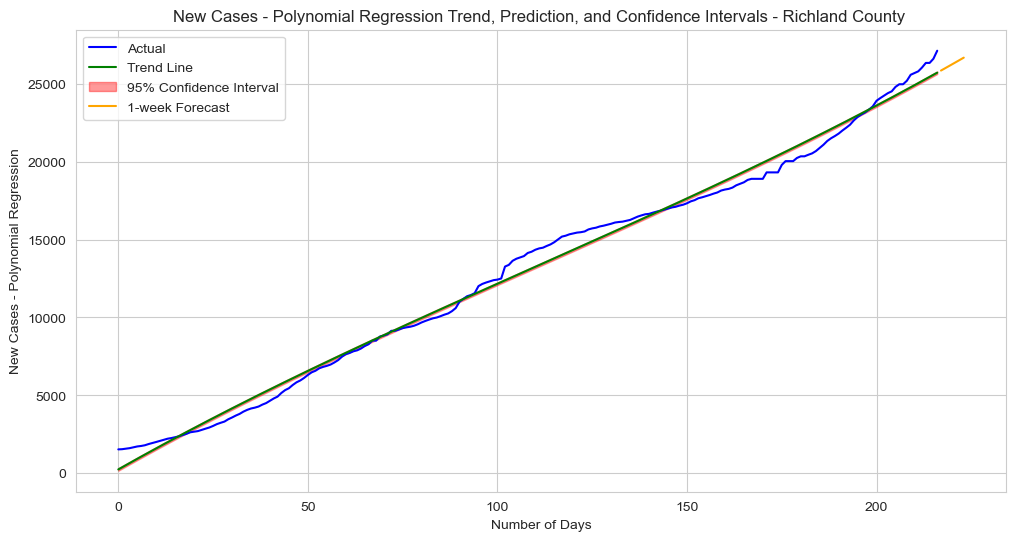

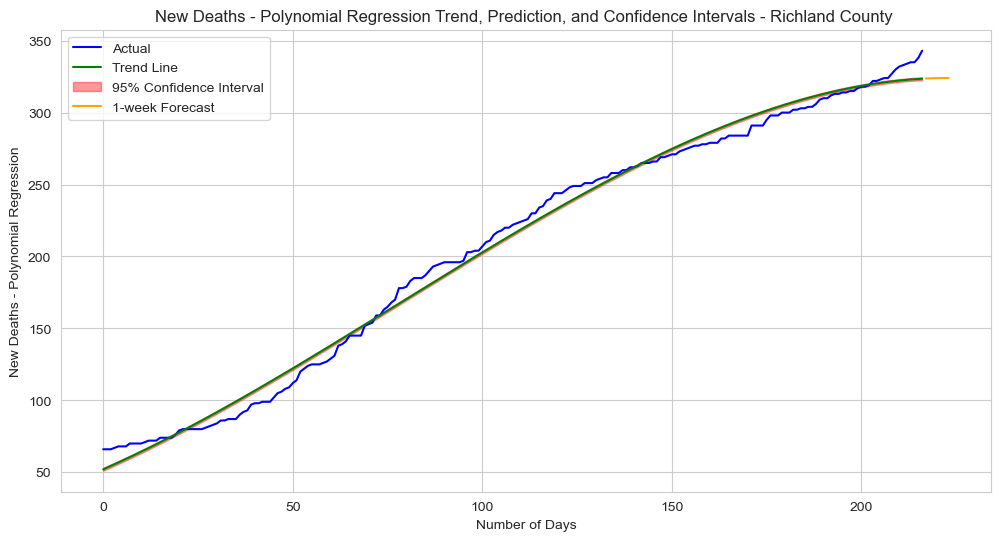

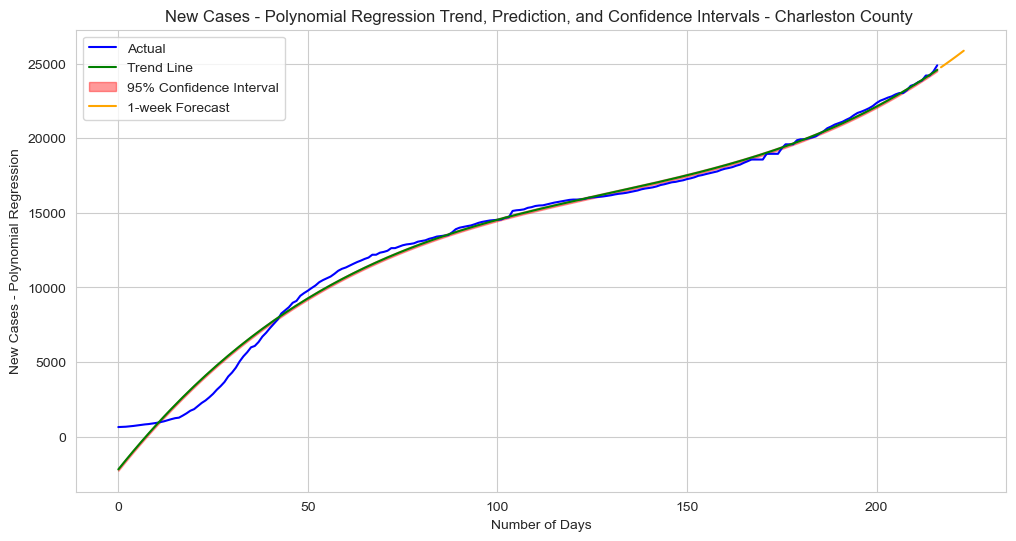

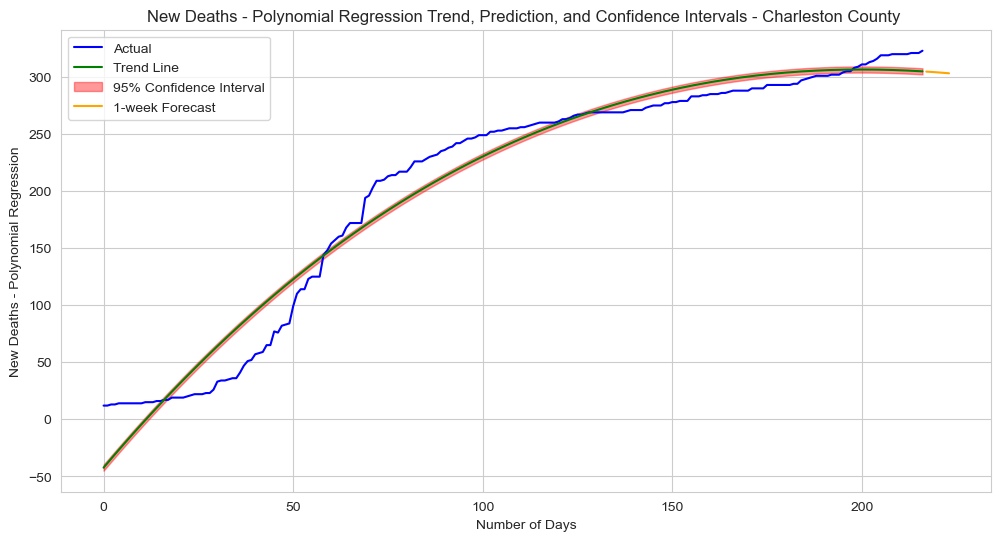

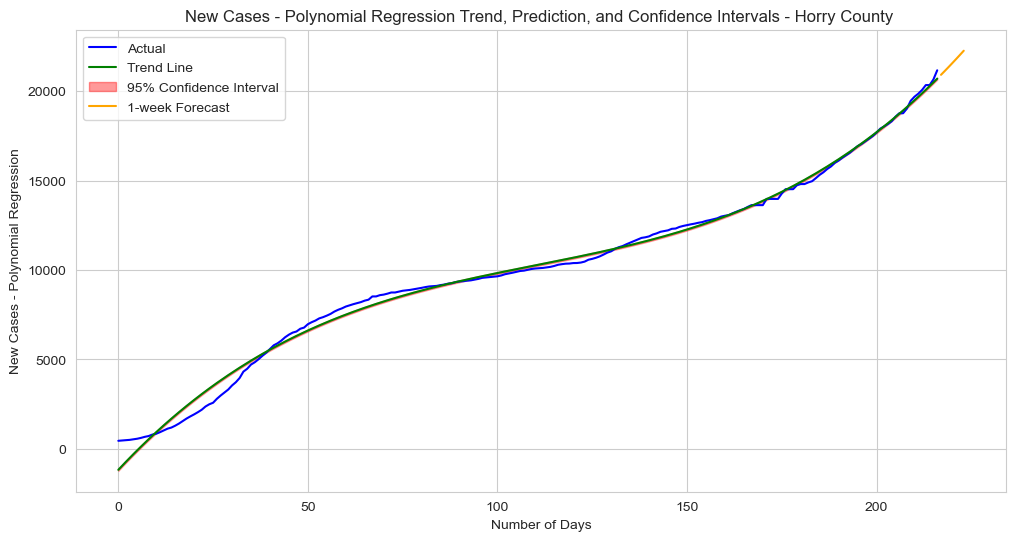

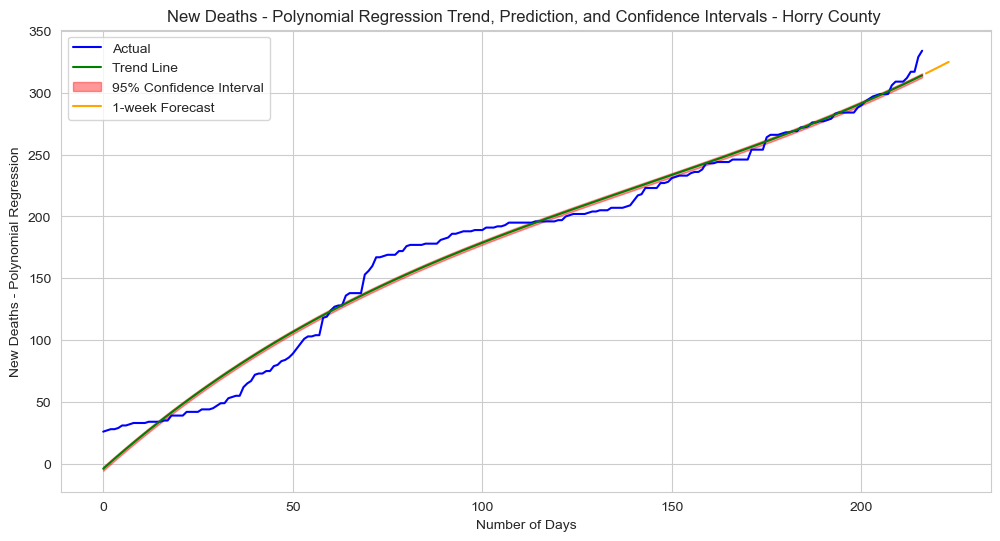

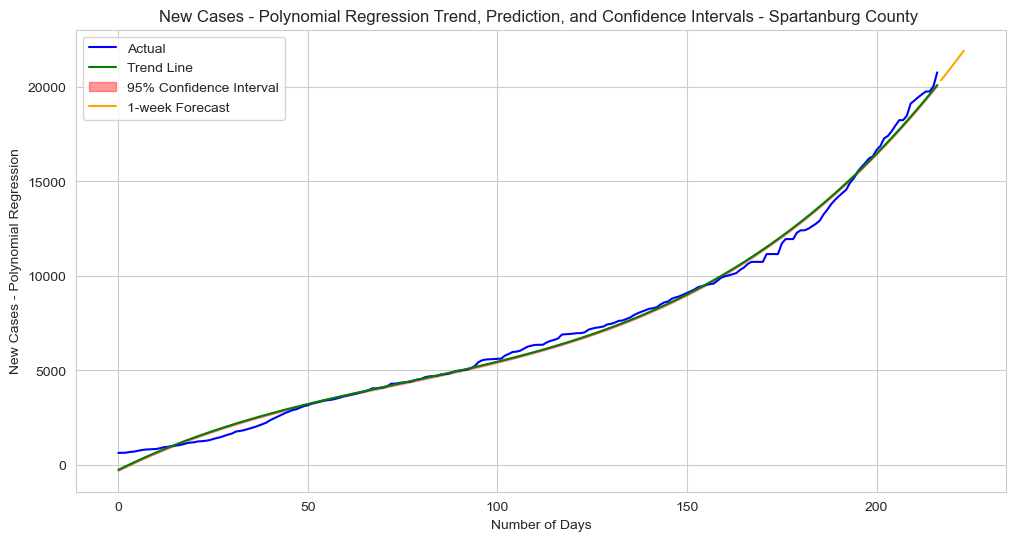

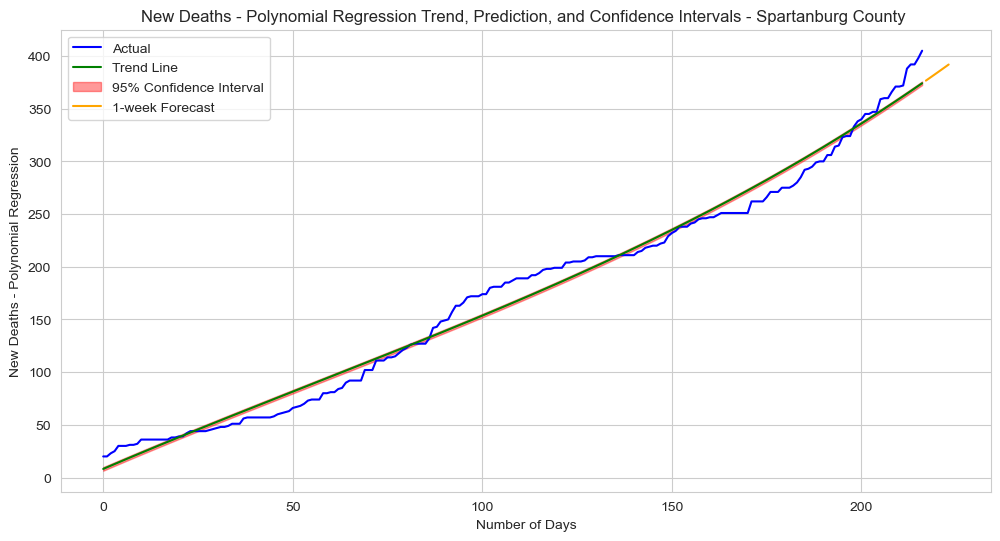

In [46]:
# Plotting regression results for each county
for county in top_county_names:
    county_data = SC_df[SC_df['County Name'] == county]
    x1= np.arange(len(county_data)).reshape(-1, 1)
    y_cases_1 = county_data['Cases'].values
    y_deaths_1= county_data['Deaths'].values

    # Polynomial regression models
    poly_model_new_cases_county, poly_county = fit_polynomial_regression(x1,y_cases_1, degree)
    poly_model_new_deaths_county, _ = fit_polynomial_regression(x1,y_deaths_1, degree)

    # Predictions
    X_poly_county = poly_county.transform(x1)
    y_pred_poly_new_cases_county = poly_model_new_cases_county.predict(X_poly_county)
    y_pred_poly_new_deaths_county = poly_model_new_deaths_county.predict(X_poly_county)

    # Calculating RMSE for each county
    rmse_poly_new_cases_county =rmse_cal(y_county_new_cases, y_pred_poly_new_cases_county)
    rmse_poly_new_deaths_county =rmse_cal(y_county_new_deaths, y_pred_poly_new_deaths_county)
    
    # Calculating Confidence Intervals
    confidence_interval_poly_new_cases_county =calc_conf_intervals_poly(poly_model_new_cases_county,x1, poly_county,y_cases_1)
    confidence_interval_poly_new_deaths_county =calc_conf_intervals_poly(poly_model_new_deaths_county,x1, poly_county,y_deaths_1)

    # Plotting the results for each county with confidence intervals and labels for polynomial regression
    plot_county_regression(county_data, county,x1,y_cases_1,
                           y_pred_poly_new_cases_county, 'New Cases - Polynomial Regression',
                           confidence_interval=confidence_interval_poly_new_cases_county,
                           forecast_dates=x1[-1] + np.arange(1, 8).reshape(-1, 1),
                           forecast_values=poly_model_new_cases_county.predict(poly_county.transform(x1[-1] + np.arange(1, 8).reshape(-1, 1))))
    
    plot_county_regression(county_data, county,x1,y_deaths_1,
                           y_pred_poly_new_deaths_county, 'New Deaths - Polynomial Regression',
                           confidence_interval=confidence_interval_poly_new_deaths_county,
                           forecast_dates=x1[-1] + np.arange(1, 8).reshape(-1, 1),
                           forecast_values=poly_model_new_deaths_county.predict(poly_county.transform(x1[-1] + np.arange(1, 8).reshape(-1, 1))))


    print("\n===================================================================================================================")



* Iterates through each county in the list of top counties.
* Extracts data for the current county from the DataFrame (SC_df).
* Prepares input data (X_county) and actual target data for new cases and deaths (y_county_new_cases, y_county_new_deaths).
* Fits polynomial regression models to predict new cases and deaths for the current county.
* Uses the fitted models to make predictions for new cases and deaths.
* Computes Root Mean Squared Error (RMSE) to evaluate model performance.
* Calculates confidence intervals for the polynomial regression predictions.
* Plots regression results for new cases and deaths for the current county.
* Includes confidence intervals and forecasted values for both.
* Prints a separator to distinguish between results for different counties.
* This code essentially conducts polynomial regression analysis for each county, evaluates model performance, calculates confidence intervals, and plots the results with forecasts and confidence intervals.

In [47]:
# Plotting regression results for each county
for county in top_county_names:
    county_data = SC_df[SC_df['County Name'] == county]
    x1= np.arange(len(county_data)).reshape(-1, 1)
    y_cases_1 = county_data['Cases'].values
    y_deaths_1= county_data['Deaths'].values

    # Polynomial regression models
    poly_model_new_cases_county, poly_county = fit_polynomial_regression(x1,y_cases_1, degree)
    poly_model_new_deaths_county, _ = fit_polynomial_regression(x1,y_deaths_1, degree)

    # Predictions
    X_poly_county = poly_county.transform(x1)
    y_pred_poly_new_cases_county = poly_model_new_cases_county.predict(X_poly_county)
    y_pred_poly_new_deaths_county = poly_model_new_deaths_county.predict(X_poly_county)

    # Calculating RMSE for each county
    rmse_poly_new_cases_county =rmse_cal(y_county_new_cases, y_pred_poly_new_cases_county)
    rmse_poly_new_deaths_county =rmse_cal(y_county_new_deaths, y_pred_poly_new_deaths_county)
    
    # Calculating Confidence Intervals
    confidence_interval_poly_new_cases_county =calc_conf_intervals_poly(poly_model_new_cases_county,x1, poly_county,y_cases_1)
    confidence_interval_poly_new_deaths_county =calc_conf_intervals_poly(poly_model_new_deaths_county,x1, poly_county,y_deaths_1)
    
    print(f"\n{county} County:")
    print(f"RMSE for Polynomial Regression (New Cases): {rmse_poly_new_cases_county:.2f}")
    print(f"RMSE for Polynomial Regression (New Deaths): {rmse_poly_new_deaths_county:.2f}")


Greenville County  County:
RMSE for Polynomial Regression (New Cases): 8698.96
RMSE for Polynomial Regression (New Deaths): 100.25

Richland County  County:
RMSE for Polynomial Regression (New Cases): 6346.06
RMSE for Polynomial Regression (New Deaths): 41.71

Charleston County  County:
RMSE for Polynomial Regression (New Cases): 7087.75
RMSE for Polynomial Regression (New Deaths): 53.25

Horry County  County:
RMSE for Polynomial Regression (New Cases): 3136.90
RMSE for Polynomial Regression (New Deaths): 28.36

Spartanburg County  County:
RMSE for Polynomial Regression (New Cases): 323.09
RMSE for Polynomial Regression (New Deaths): 12.65


* Greenville County has the highest RMSE values for both new cases and deaths, indicating a larger error in predictions compared to other counties.
* Spartanburg County has the lowest RMSE values, indicating better model performance for predicting both new cases and deaths.
* The RMSE values provide insights into the accuracy of the polynomial regression models for each county's COVID-19 data.